# **Importing Library**




In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
import warnings
warnings.filterwarnings('ignore')

# **Importing Data**

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
df.head()

months_as_customer  age  policy_number  ... auto_year fraud_reported _c39
0                 328   48         521585  ...      2004              Y  NaN
1                 228   42         342868  ...      2007              Y  NaN
2                 134   29         687698  ...      2007              N  NaN
3                 256   41         227811  ...      2014              Y  NaN
4                 228   44         367455  ...      2009              N  NaN

[5 rows x 40 columns]

# ***EDA***

In [4]:
df.shape

(1000, 40)

In [5]:
df.describe()

months_as_customer          age  ...    auto_year  _c39
count         1000.000000  1000.000000  ...  1000.000000   0.0
mean           203.954000    38.948000  ...  2005.103000   NaN
std            115.113174     9.140287  ...     6.015861   NaN
min              0.000000    19.000000  ...  1995.000000   NaN
25%            115.750000    32.000000  ...  2000.000000   NaN
50%            199.500000    38.000000  ...  2005.000000   NaN
75%            276.250000    44.000000  ...  2010.000000   NaN
max            479.000000    64.000000  ...  2015.000000   NaN

[8 rows x 19 columns]

In [6]:
df.describe(include=['O'])

policy_bind_date policy_state  ... auto_model fraud_reported
count              1000         1000  ...       1000           1000
unique              951            3  ...         39              2
top          01-01-2006           OH  ...        RAM              N
freq                  3          352  ...         43            753

[4 rows x 21 columns]

## **checking null value**

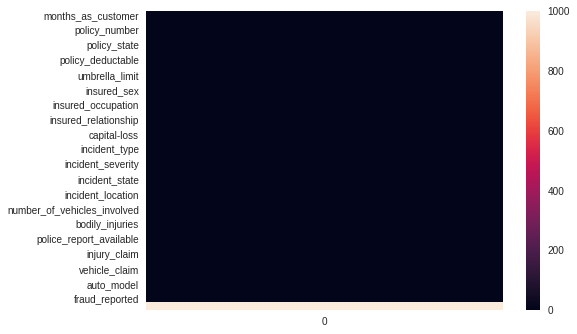

In [ ]:
sns.heatmap(df.isnull().sum().to_frame())

In [ ]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [ ]:
df.drop('_c39',axis=1,inplace=True)

## **Data Formatting**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [ ]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [ ]:
df.drop(['incident_location','policy_number','incident_date','policy_bind_date'],axis=1,inplace=True)# unique count is 1000

## **Visualization**

In [ ]:
cat=[]
num=[]
for i in df.columns:
  if df[i].dtype == 'O':
    cat.append(i)
  else:
    num.append(i)

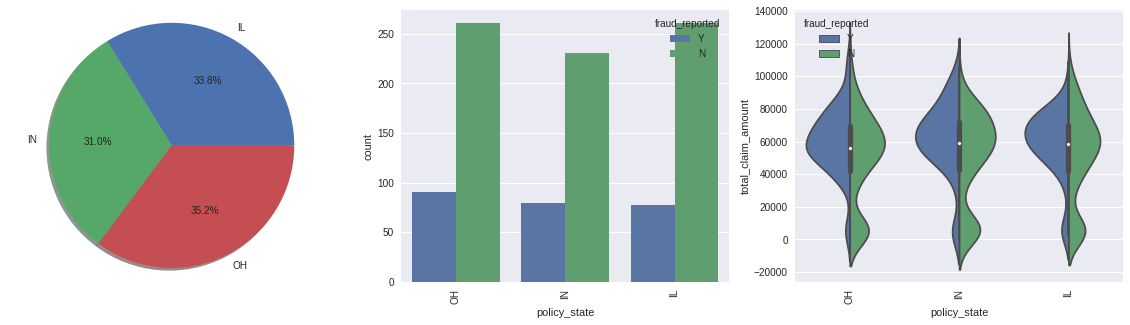

IL    0.227811
IN    0.254839
OH    0.258523
Name: policy_state, dtype: float64


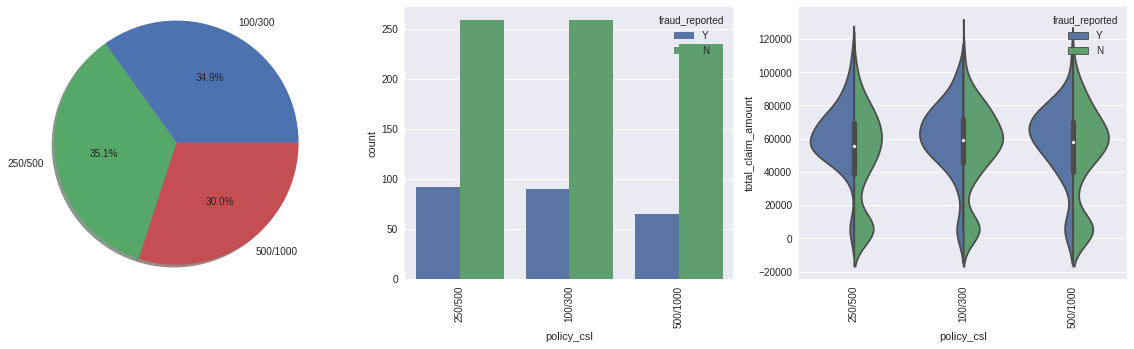

250/500     0.262108
100/300     0.257880
500/1000    0.216667
Name: policy_csl, dtype: float64


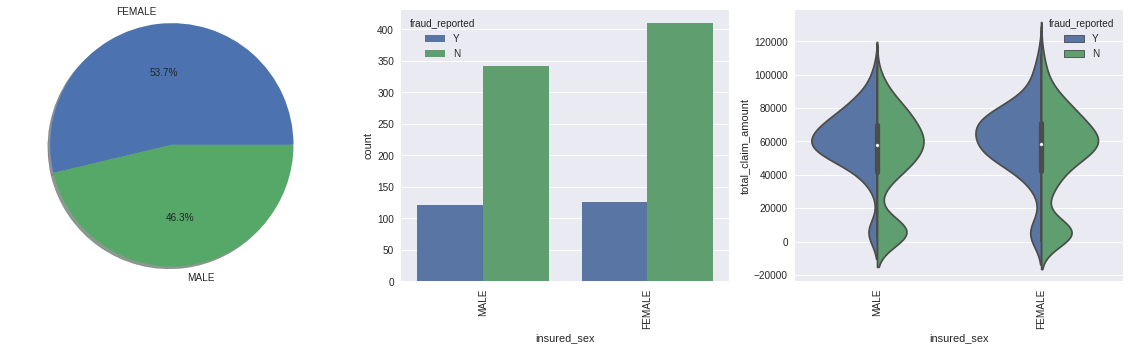

FEMALE    0.234637
MALE      0.261339
Name: insured_sex, dtype: float64


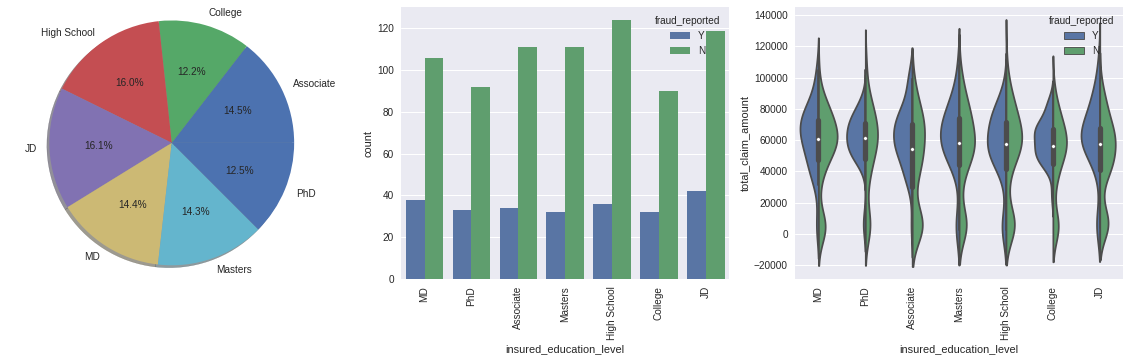

Associate      0.234483
College        0.262295
High School    0.225000
JD             0.260870
MD             0.263889
Masters        0.223776
PhD            0.264000
Name: insured_education_level, dtype: float64


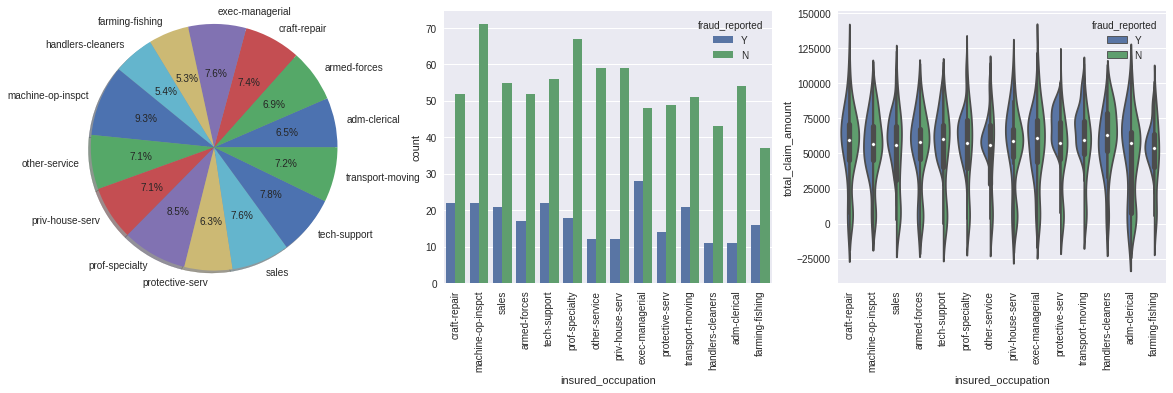

adm-clerical         0.169231
armed-forces         0.246377
craft-repair         0.297297
exec-managerial      0.368421
farming-fishing      0.301887
handlers-cleaners    0.203704
machine-op-inspct    0.236559
other-service        0.169014
priv-house-serv      0.169014
prof-specialty       0.211765
protective-serv      0.222222
sales                0.276316
tech-support         0.282051
transport-moving     0.291667
Name: insured_occupation, dtype: float64


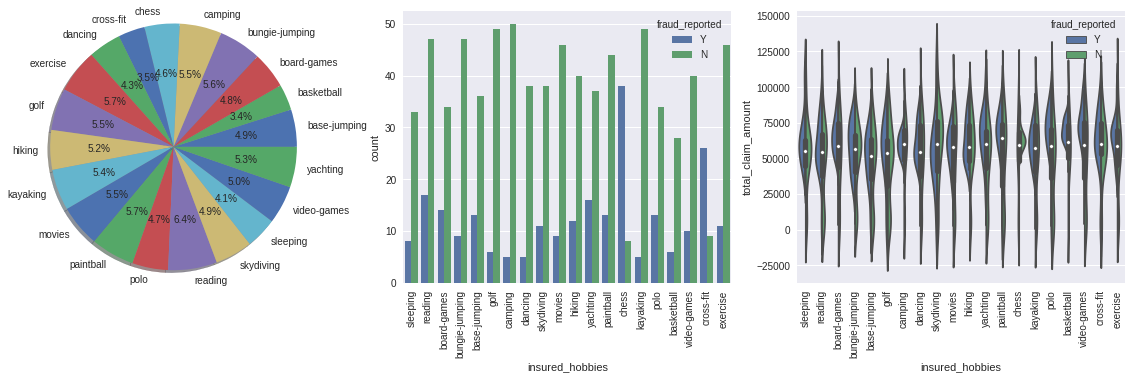

base-jumping      0.265306
basketball        0.176471
board-games       0.291667
bungie-jumping    0.160714
camping           0.090909
chess             0.826087
cross-fit         0.742857
dancing           0.116279
exercise          0.192982
golf              0.109091
hiking            0.230769
kayaking          0.092593
movies            0.163636
paintball         0.228070
polo              0.276596
reading           0.265625
skydiving         0.224490
sleeping          0.195122
video-games       0.200000
yachting          0.301887
Name: insured_hobbies, dtype: float64


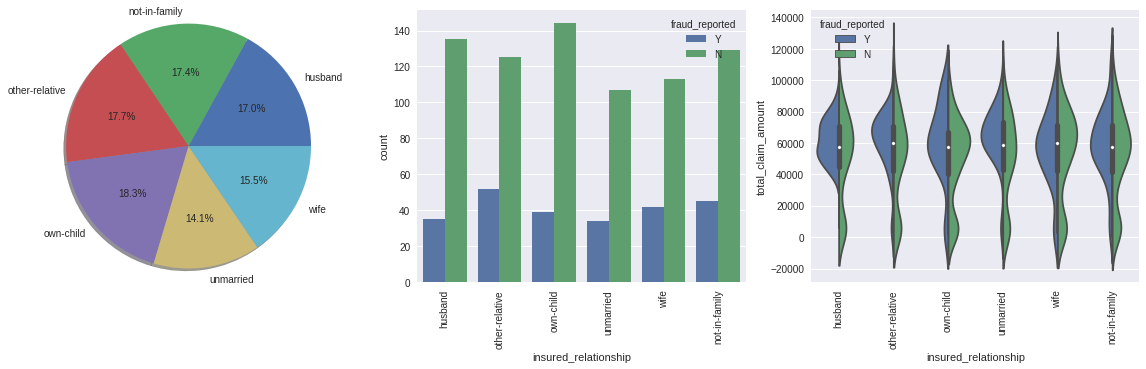

husband           0.205882
not-in-family     0.258621
other-relative    0.293785
own-child         0.213115
unmarried         0.241135
wife              0.270968
Name: insured_relationship, dtype: float64


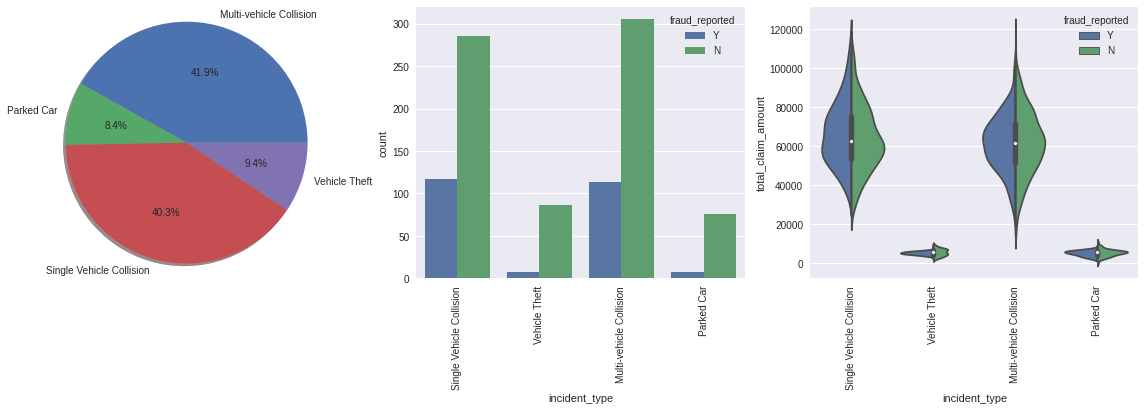

Multi-vehicle Collision     0.272076
Parked Car                  0.095238
Single Vehicle Collision    0.290323
Vehicle Theft               0.085106
Name: incident_type, dtype: float64


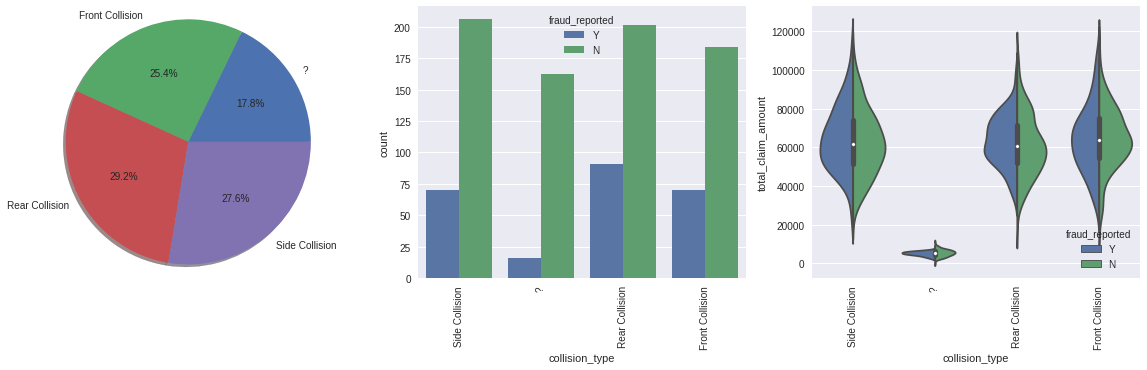

Rear Collision     0.311644
Side Collision     0.253623
Front Collision    0.275591
?                  0.089888
Name: collision_type, dtype: float64


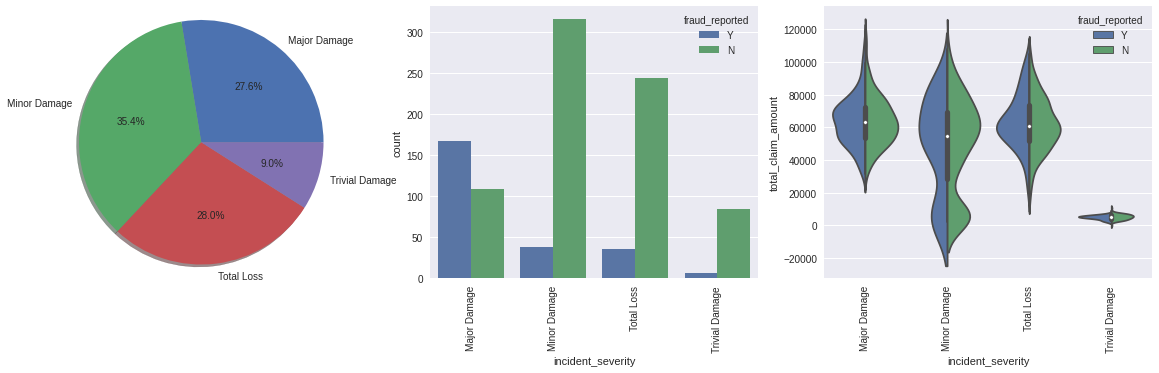

Major Damage      0.605072
Minor Damage      0.107345
Total Loss        0.128571
Trivial Damage    0.066667
Name: incident_severity, dtype: float64


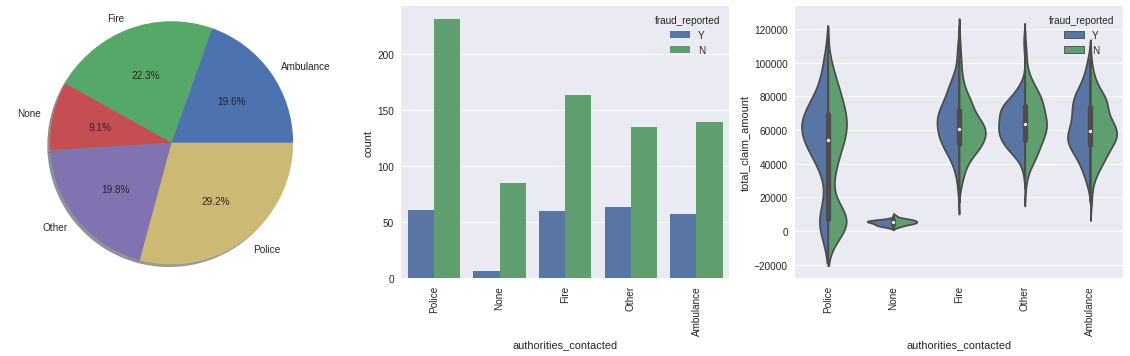

Ambulance    0.290816
Fire         0.269058
None         0.065934
Other        0.318182
Police       0.208904
Name: authorities_contacted, dtype: float64


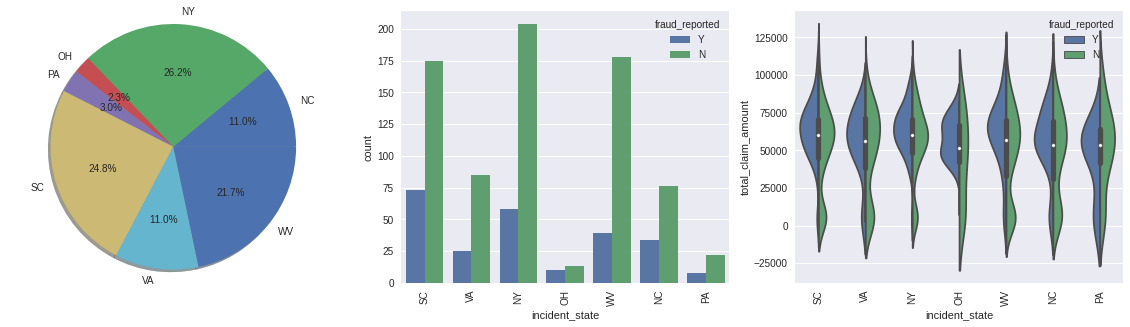

NC    0.309091
NY    0.221374
OH    0.434783
PA    0.266667
SC    0.294355
VA    0.227273
WV    0.179724
Name: incident_state, dtype: float64


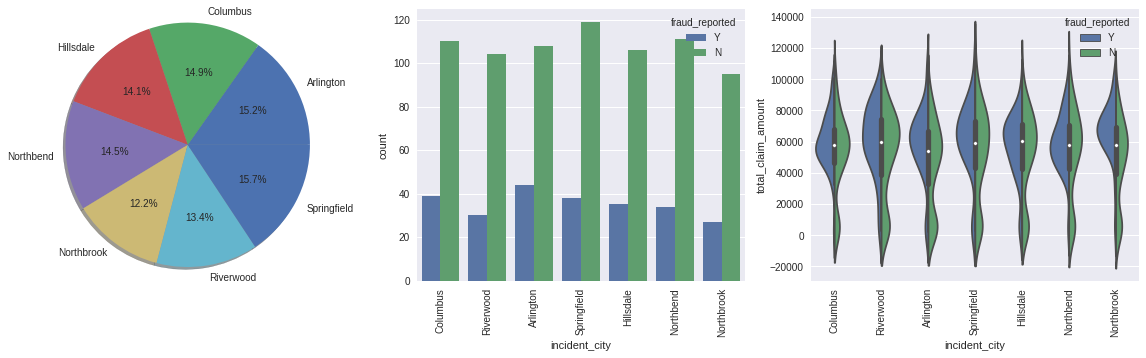

Arlington      0.289474
Columbus       0.261745
Hillsdale      0.248227
Northbend      0.234483
Northbrook     0.221311
Riverwood      0.223881
Springfield    0.242038
Name: incident_city, dtype: float64


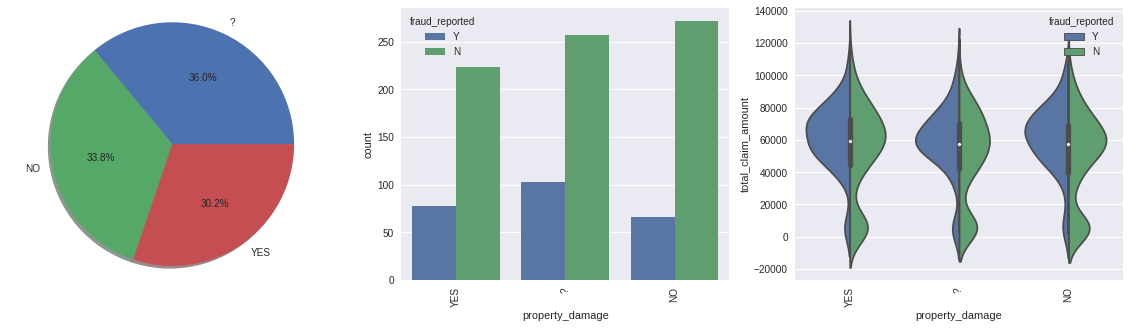

?      0.286111
NO     0.195266
YES    0.258278
Name: property_damage, dtype: float64


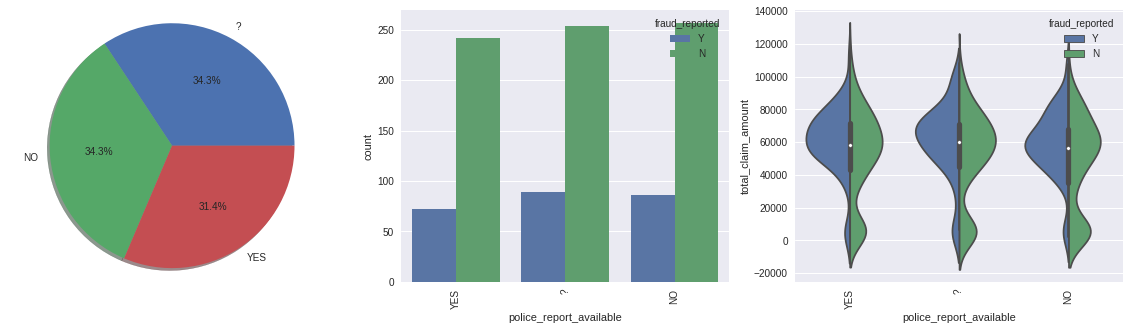

?      0.259475
NO     0.250729
YES    0.229299
Name: police_report_available, dtype: float64


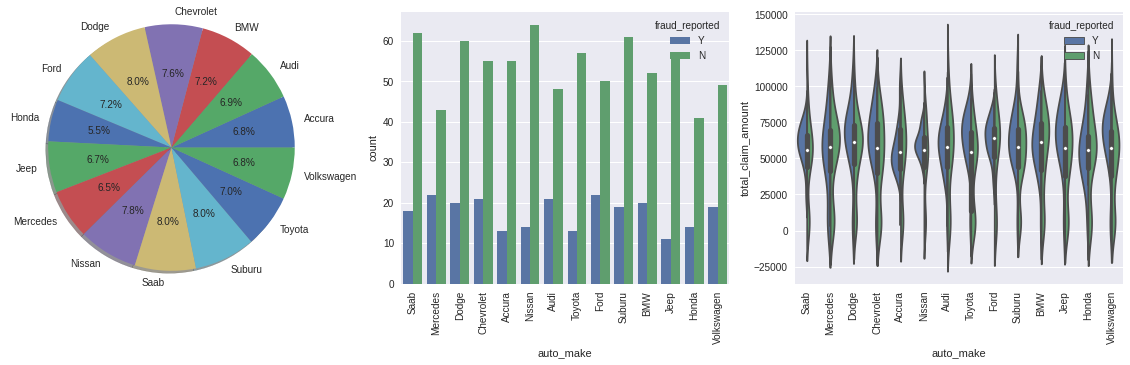

Accura        0.191176
Audi          0.304348
BMW           0.277778
Chevrolet     0.276316
Dodge         0.250000
Ford          0.305556
Honda         0.254545
Jeep          0.164179
Mercedes      0.338462
Nissan        0.179487
Saab          0.225000
Suburu        0.237500
Toyota        0.185714
Volkswagen    0.279412
Name: auto_make, dtype: float64


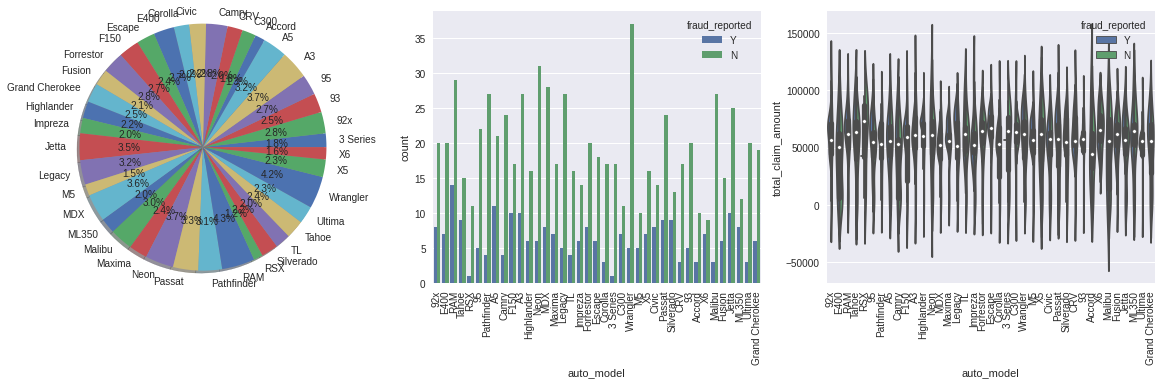

3 Series          0.055556
92x               0.285714
93                0.200000
95                0.185185
A3                0.270270
A5                0.343750
Accord            0.230769
C300              0.388889
CRV               0.150000
Camry             0.142857
Civic             0.363636
Corolla           0.150000
E400              0.259259
Escape            0.250000
F150              0.370370
Forrestor         0.285714
Fusion            0.285714
Grand Cherokee    0.240000
Highlander        0.272727
Impreza           0.300000
Jetta             0.285714
Legacy            0.156250
M5                0.333333
MDX               0.222222
ML350             0.400000
Malibu            0.100000
Maxima            0.291667
Neon              0.162162
Passat            0.272727
Pathfinder        0.129032
RAM               0.325581
RSX               0.083333
Silverado         0.409091
TL                0.200000
Tahoe             0.375000
Ultima            0.130435
Wrangler          0.119048
X

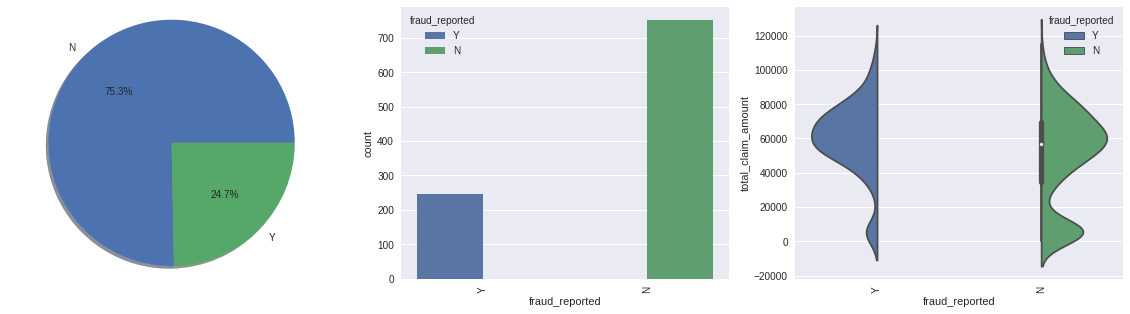

N    NaN
Y    1.0
Name: fraud_reported, dtype: float64


In [ ]:
for i in cat:
  labels = df[i].astype('category').cat.categories.tolist()
  counts = df[i].value_counts()
  sizes = [counts[var_cat] for var_cat in labels]
  fig1, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,5))
  ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
  ax1.axis('equal')
  plt.xlabel(i)
  sns.countplot(x=i,data=df,ax=ax2,hue='fraud_reported')
  ax2.set_xticklabels(labels=df[i].unique(),rotation=90)
  sns.violinplot(x=i,y='total_claim_amount',data=df,ax=ax3,split=True,hue='fraud_reported')
  ax3.set_xticklabels(labels=df[i].unique(),rotation=90)
  plt.show()
  print(df[i].loc[df['fraud_reported']=='Y'].value_counts()/df[i].value_counts())

1- Class data set is imbalanced(25:75::Y:N). 

2- police_report_available,incident_city,insured_relationship,insured education level,insured_sex,policy_csl,policy_status has no effect on o/p 

3-incident_state,incident_severity,authorities_contacted,collision_type,incident_type,insured_hobbies,insured_occupation has high variance in o/p ratio.

4- Date can be transformed to datetime type for further analysis



Data filtering:-

In [ ]:
count=df.nunique()
num_cat=[]#catagirical type for numarical dtype
num_num=[]
for i in num:
  if count[i]<15:
    num_cat.append(i)
  else:
    num_num.append(i)

In [ ]:
def pplot(df,i):
  plt.figure(figsize=(20,5))
  plt.subplot(1,3,1)
  
  sns.histplot(x=i,data=df,kde=True,hue='fraud_reported')
  plt.subplot(1,3,2)
  stat.probplot(df[i],dist='norm',plot=pylab)
  plt.subplot(1,3,3)
  sns.boxplot(y=i,data=df)
  plt.show()

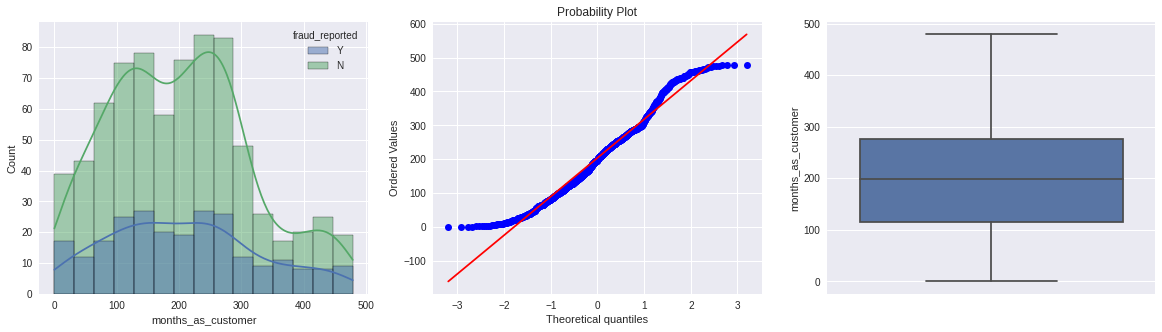

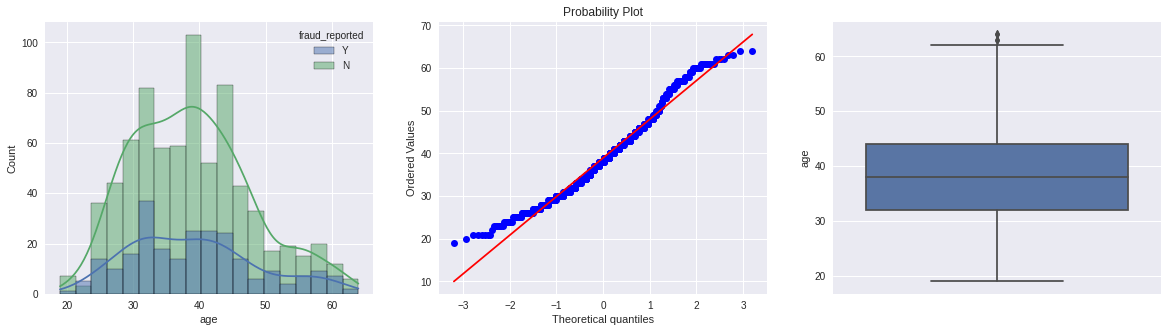

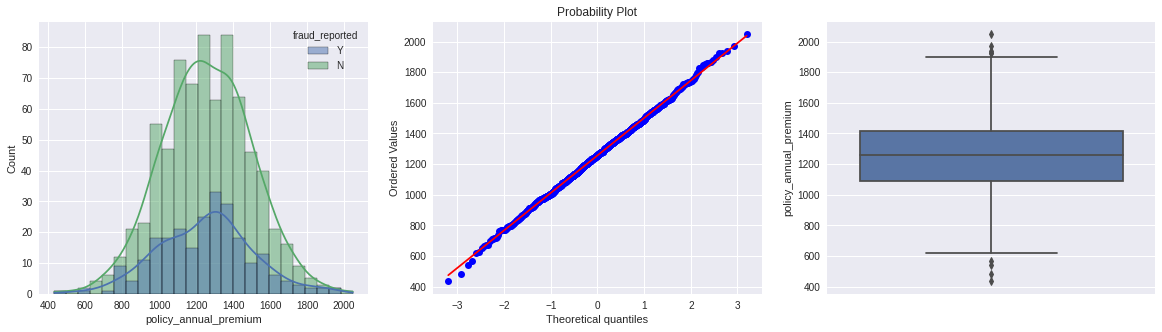

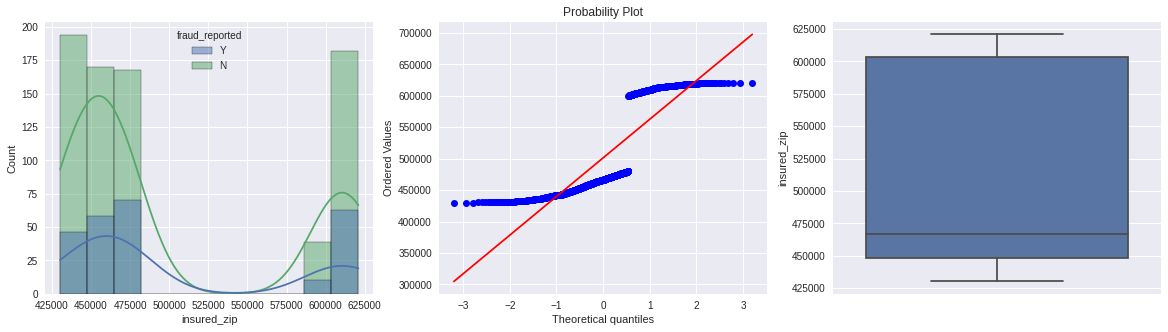

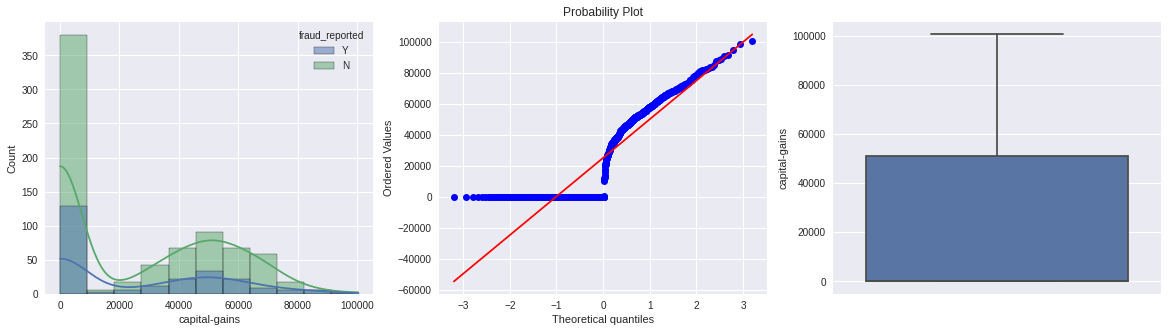

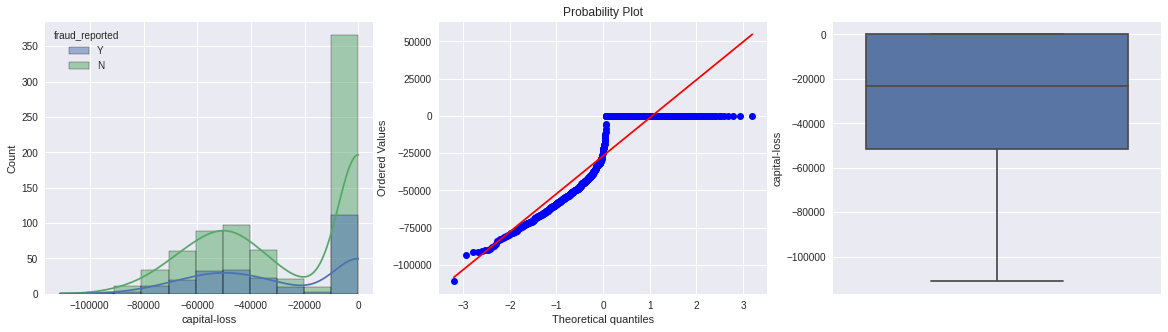

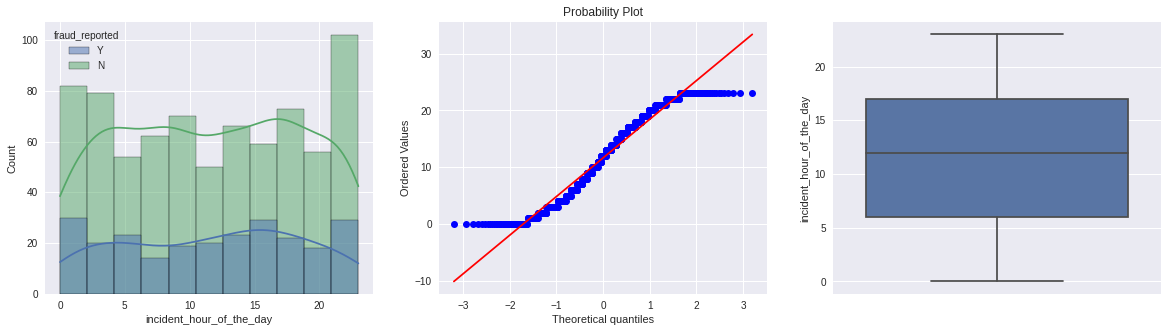

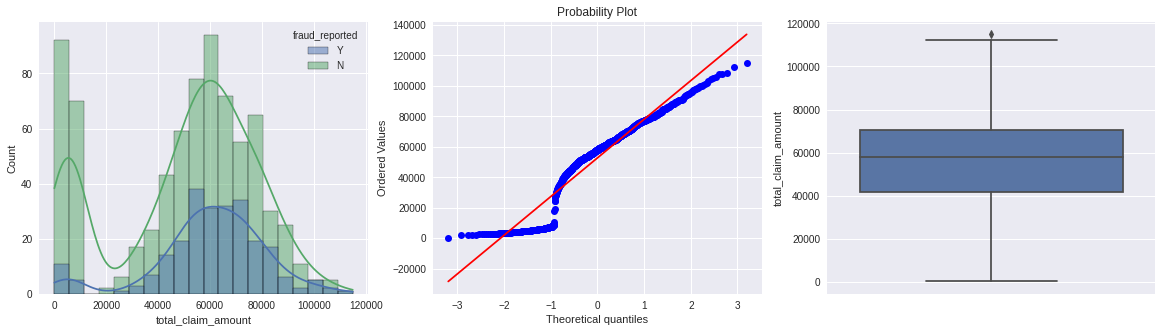

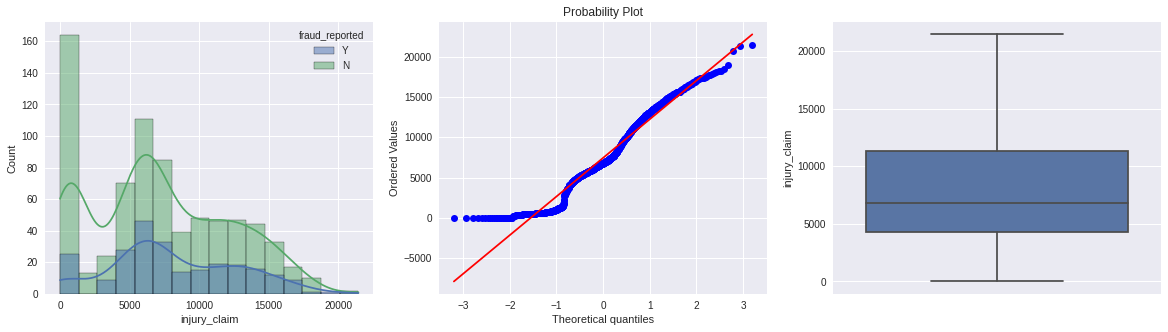

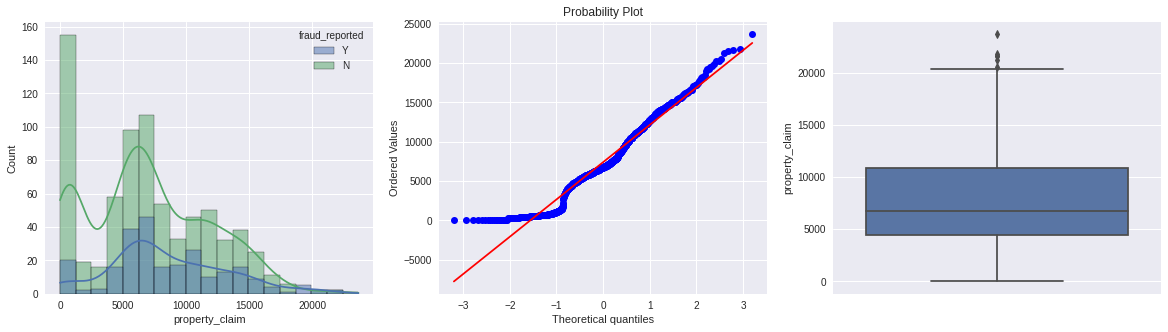

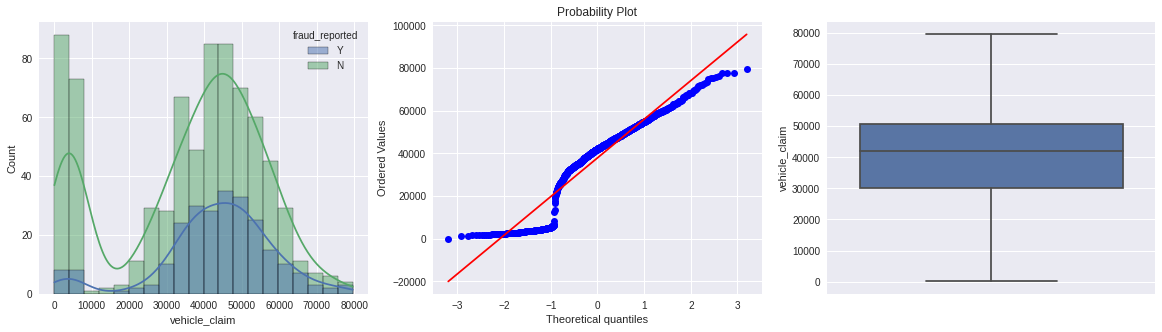

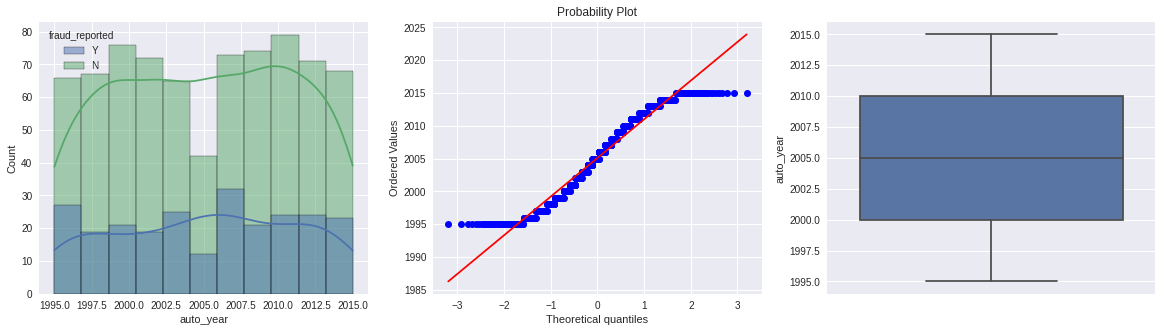

In [ ]:
import scipy.stats as stat
import pylab 

for i in num_num:
  pplot(df,i)

 1. higher the clam, Prooerty claim is higher the is chancage of fraud
 2. auto year, incident_hour_of_the_day is almost uniformaly distributed 

In [ ]:
for i in ['cg','iz','cl','tca','vc']:
  num_cat.append(i)
df['cg']=1
df['iz']=1
df['cl']=1
df['tca']=1
df['vc']=1
for i in df.index:
  if df['capital-gains'][i]==0:
    df['cg'][i]=0
  if df['insured_zip'][i]<525000:
    df['iz'][i]=0
  if df['capital-loss'][i]==0:
    df['cl'][i]=0
  if df['total_claim_amount'][i]<15000:
    df['tca'][i]=0
  elif df['total_claim_amount'][i]<40000:
    df['tca'][i]=1
  elif df['total_claim_amount'][i]<60000:
    df['tca'][i]=2
  elif df['total_claim_amount'][i]<80000:
    df['tca'][i]=3
  elif df['total_claim_amount'][i]<100000:
    df['tca'][i]=4
  elif df['total_claim_amount'][i]<120000:
    df['tca'][i]=5
  if df['vehicle_claim'][i]<10000:
    df['vc'][i]=0

# cl,cg,iz is added for computer to understand that there is a diff in these data

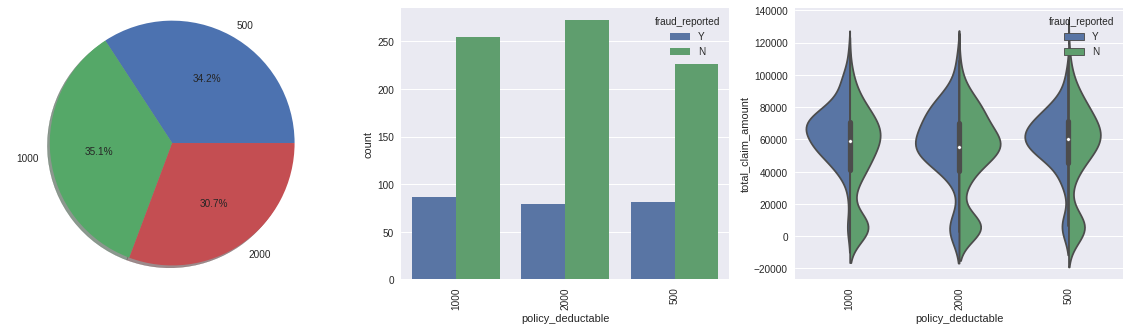

500     0.254386
1000    0.225071
2000    0.263844
Name: policy_deductable, dtype: float64


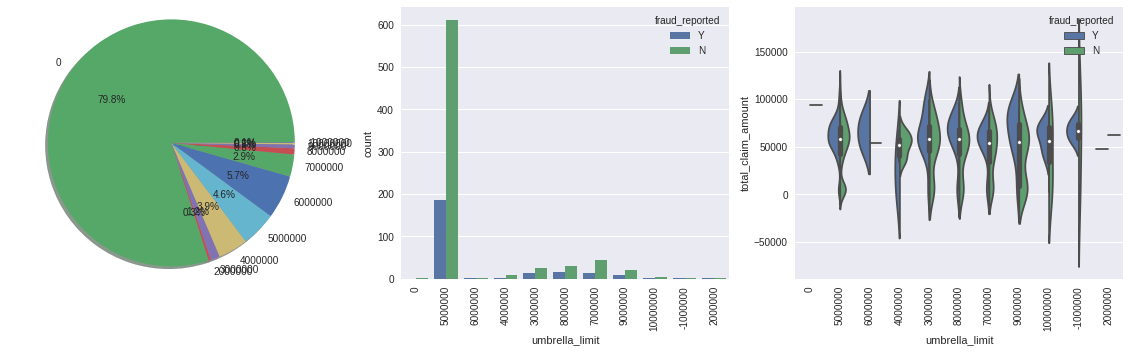

-1000000          NaN
 0           0.234336
 2000000     0.666667
 3000000     0.166667
 4000000     0.333333
 5000000     0.326087
 6000000     0.228070
 7000000     0.310345
 8000000     0.375000
 9000000     0.400000
 10000000    0.500000
Name: umbrella_limit, dtype: float64


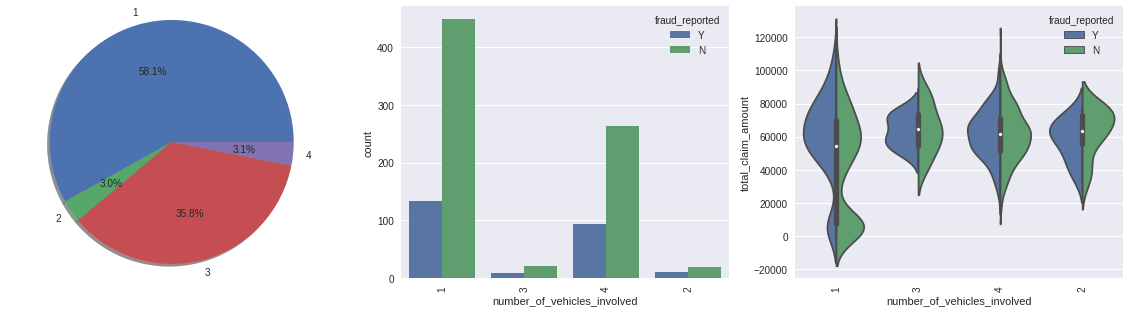

1    0.228916
3    0.262570
4    0.354839
2    0.300000
Name: number_of_vehicles_involved, dtype: float64


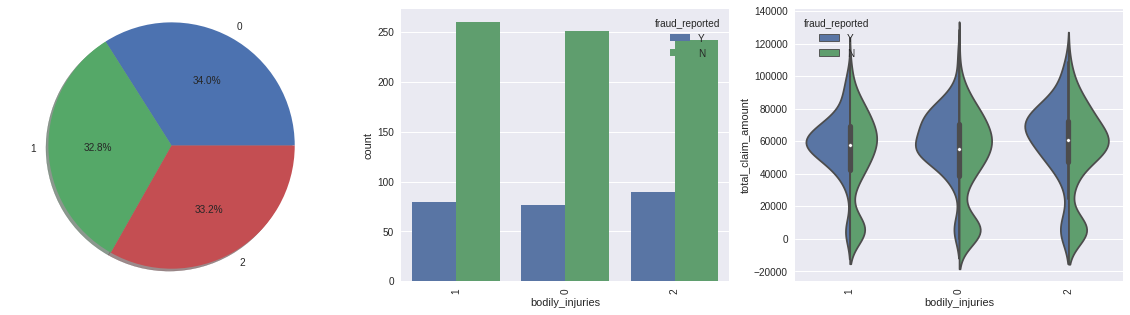

0    0.235294
1    0.234756
2    0.271084
Name: bodily_injuries, dtype: float64


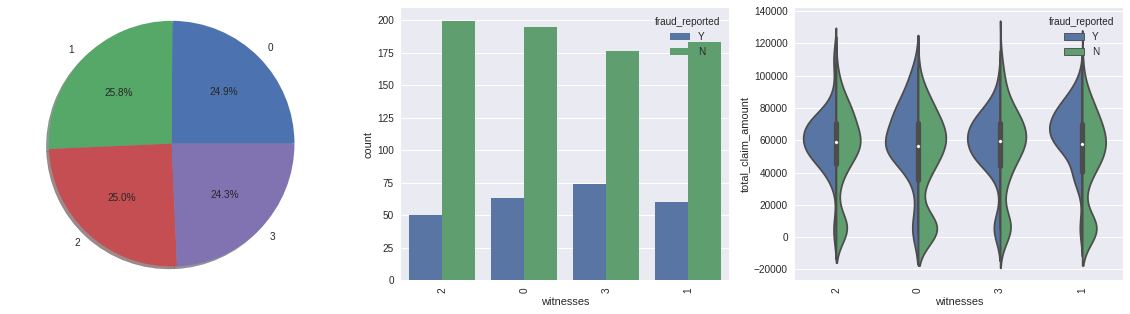

0    0.200803
1    0.244186
2    0.296000
3    0.246914
Name: witnesses, dtype: float64


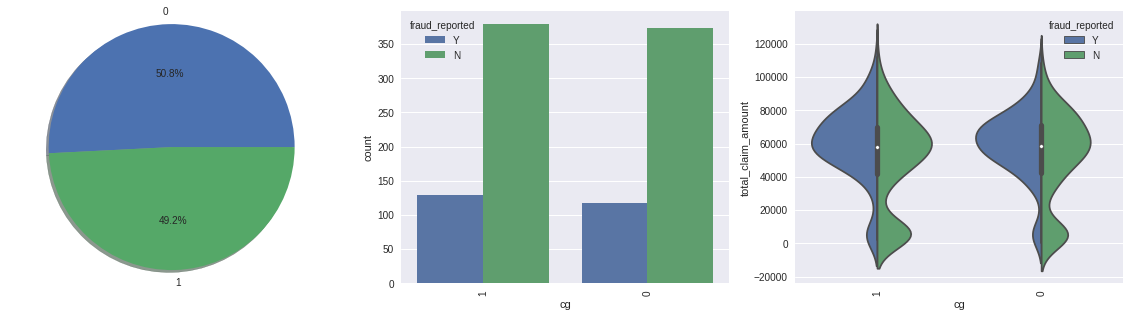

0    0.253937
1    0.239837
Name: cg, dtype: float64


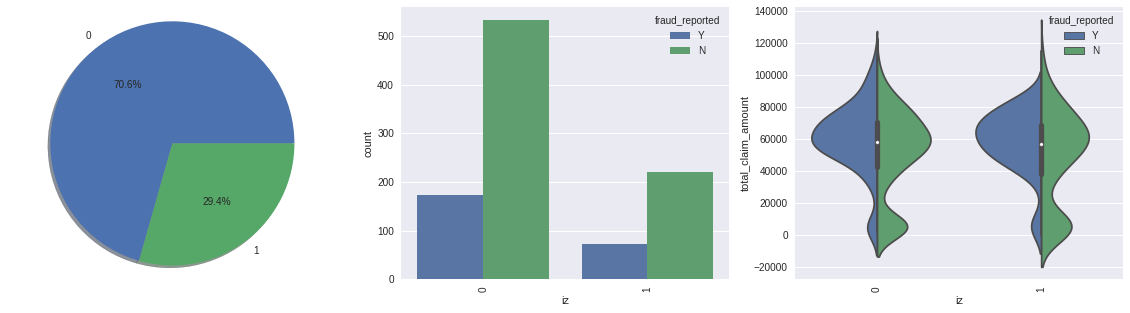

0    0.246459
1    0.248299
Name: iz, dtype: float64


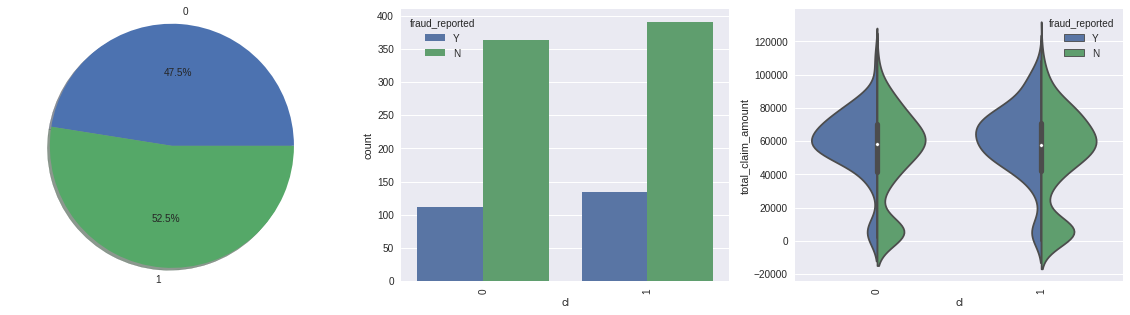

1    0.257143
0    0.235789
Name: cl, dtype: float64


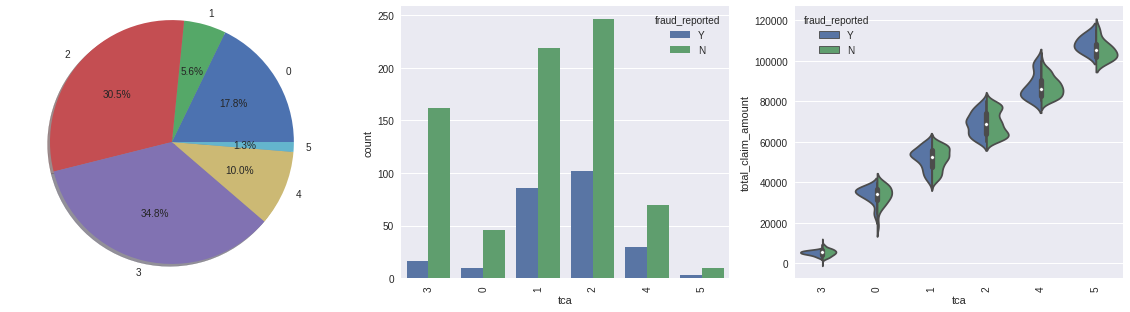

0    0.089888
1    0.178571
2    0.281967
3    0.293103
4    0.300000
5    0.230769
Name: tca, dtype: float64


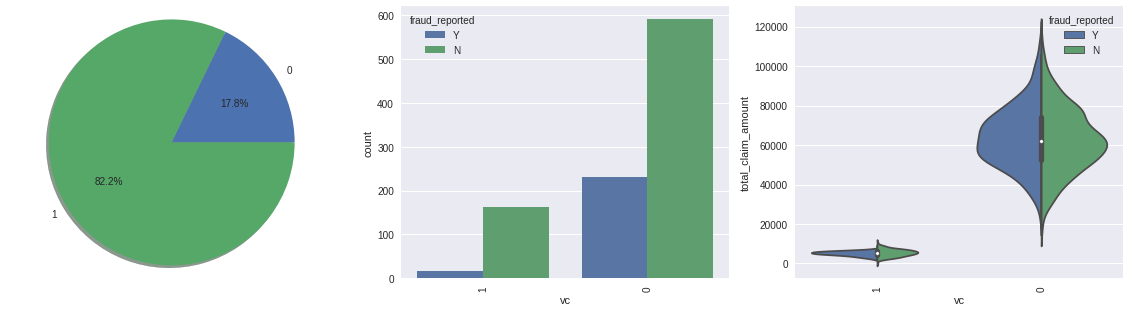

1    0.281022
0    0.089888
Name: vc, dtype: float64


In [ ]:
for i in num_cat:
  labels = df[i].astype('category').cat.categories.tolist()
  counts = df[i].value_counts()
  sizes = [counts[var_cat] for var_cat in labels]
  fig1, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,5))
  ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
  ax1.axis('equal')
  plt.xlabel(i)
  sns.countplot(x=i,data=df,ax=ax2,hue='fraud_reported')
  ax2.set_xticklabels(labels=df[i].unique(),rotation=90)
  sns.violinplot(x=i,y='total_claim_amount',data=df,ax=ax3,split=True,hue='fraud_reported')
  ax3.set_xticklabels(labels=df[i].unique(),rotation=90)
  plt.show()
  print(df[i].loc[df['fraud_reported']=='Y'].value_counts()/df[i].value_counts())

1. witness,bodily_injuries,policy_detuctable,cg,iz,cl, has very low variance with respect to o/p ratio
2. No_of_verical_involved, umbrella_limit, tca, vc has some significant variation in o/p ratio and claim amount 


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   object 
 3   policy_csl                   1000 non-null   object 
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_limit               1000 non-null   int64  
 7   insured_zip                  1000 non-null   int64  
 8   insured_sex                  1000 non-null   object 
 9   insured_education_level      1000 non-null   object 
 10  insured_occupation           1000 non-null   object 
 11  insured_hobbies              1000 non-null   object 
 12  insured_relationship         1000 non-null   object 
 13  capital-gains      

In [ ]:
temp_cat=[]
num=[]
count=df.nunique()
for i in df.columns:
  if count[i] <= 20:
    temp_cat.append(i)
  elif df[i].dtype=="O":
    temp_cat.append(i)
  else:
    num.append(i)

In [ ]:
df['pro']=1
def per_cat(df,feature,k,l):
  per_list=[]
  no_per_list=[]
  
  for i in df[feature].unique():
    temp=df.loc[df[feature]==i]
    per=(temp[feature].loc[temp['fraud_reported']=='Y'].count()/temp[feature].count())*100
    no_per=(temp[feature].loc[temp['fraud_reported']=='N'].count()/temp[feature].count())*100
    #print('% of >50K income when '+str(feature)+' is '+str(i)+' and '+str(l)+' is '+str(k)+' = '+str(per))
    per_list.append(per)
    no_per_list.append(no_per)
    if per>=40:
      temp['pro'].loc[temp[feature]==i]=1
    else:
      temp['pro'].loc[temp[feature]==i]=0
    df.loc[df[feature]==i]=temp
  #plt.figure(figsize=(7,5),clear=True)
  #plt.subplot(1,2,1)
  #plt.bar(x=df[feature].unique(),height=per_list)
  #plt.subplot(1,2,2)
  #plt.bar(x=df[feature].unique(),height=no_per_list,color='r')
  #plt.show()
  #plt.xlabel(str(feature)+" when "+str(l)+" is "+str(k))
  per_list=[]
  return(df)


In [ ]:
new_feature=pd.DataFrame()
temp_cat.remove('fraud_reported')
temp_cat.remove('pro')
for i in temp_cat:
  for j in temp_cat:
    if i != j:
      for k in df[i].unique():
        temp=df.loc[df[i]==k]
        #sns.countplot(x=j,data=temp)
        #plt.show()
        temp=per_cat(temp,j,k,i)
        df.loc[df[i]==k]=temp
      new_feature[i+'_'+j]=df['pro']

        
  temp_cat.remove(i)


In [ ]:
nf=new_feature.T.drop_duplicates(subset=None, keep='first', inplace=False).T

In [ ]:
nf['fraud_reported']=df['fraud_reported'].map({'Y':1,'N':0})

In [ ]:
pd.DataFrame(nf.corr()['fraud_reported'].abs()).sort_values(by='fraud_reported',ascending=False)[:10]

fraud_reported
fraud_reported                              1.000000
insured_occupation_auto_model               0.561146
auto_make_incident_severity                 0.513766
policy_state_incident_severity              0.512637
insured_occupation_incident_severity        0.511440
insured_occupation_insured_hobbies          0.509422
auto_make_insured_hobbies                   0.504913
incident_city_auto_model                    0.448254
insured_relationship_insured_hobbies        0.407474
incident_city_insured_hobbies               0.396279

In [ ]:
temp_fea=list(pd.DataFrame(nf.corr()['fraud_reported']).sort_values(by='fraud_reported',ascending=False)[:11].index)



1.   Ticket with F and P has high rate of survival
2.   Cabin with A, M and T has low rate of survival



## **Encoding**:- categories are encoded according to the percentage of value represents edible class (percentage encoding)

In [ ]:
df.head()

months_as_customer  age policy_state policy_csl  ...  cl  tca  vc  pro
0                 328   48           OH    250/500  ...   0    3   1    0
1                 228   42           IN    250/500  ...   0    0   0    0
2                 134   29           OH    100/300  ...   0    1   1    0
3                 256   41           IL    250/500  ...   1    3   1    0
4                 228   44           IL   500/1000  ...   1    0   0    0

[5 rows x 41 columns]

In [ ]:
temp_cat=[]
num=[]
count=df.nunique()
for i in df.columns:
  if count[i] <= 20:
    temp_cat.append(i)
  elif df[i].dtype=="O":
    temp_cat.append(i)
  else:
    num.append(i)
enc=[]
oh=[]
for i in temp_cat:
  if count[i]>5:
    enc.append(i)
  else:
    oh.append(i)

In [ ]:
df_cat=pd.DataFrame(columns=enc)
df_e=df.loc[df['fraud_reported']=='Y']
df_p=df.loc[df['fraud_reported']=='N']
df_encoding=pd.DataFrame(df,copy=True)
for i in df_cat.columns:
  for j in df[i].unique():
    per_e=(df_e[i].loc[df[i]==j].count()/df[i].loc[df[i]==j].count())*100
    per_p=(df_p[i].loc[df[i]==j].count()/df[i].loc[df[i]==j].count())*100
    df_encoding[i].loc[df_encoding[i]==j]=per_p
  
    
#df_cat['diff']=(df_cat['percent_e']-df_cat['percent_p']).abs()




In [ ]:
pd.set_option('display.max_rows',None)

In [ ]:
df_encoding.head()

months_as_customer  age policy_state policy_csl  ...  cl        tca  vc  pro
0                 328   48           OH    250/500  ...   0  70.689655   1    0
1                 228   42           IN    250/500  ...   0  91.011236   0    0
2                 134   29           OH    100/300  ...   0  82.142857   1    0
3                 256   41           IL    250/500  ...   1  70.689655   1    0
4                 228   44           IL   500/1000  ...   1  91.011236   0    0

[5 rows x 41 columns]

In [ ]:
df.drop('pro',axis=1,inplace=True)

In [ ]:
oh.remove('pro')

In [ ]:
ohe=pd.get_dummies(df[oh],drop_first=True)

In [ ]:
df_encoding=pd.concat([df_encoding[enc],ohe,nf[temp_fea],df[num]],axis=1)

## **Changing Data type**

In [ ]:
df_encoding=df_encoding.astype(float)

In [ ]:
df_encoding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 64 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   umbrella_limit                          1000 non-null   float64
 1   insured_education_level                 1000 non-null   float64
 2   insured_occupation                      1000 non-null   float64
 3   insured_hobbies                         1000 non-null   float64
 4   insured_relationship                    1000 non-null   float64
 5   incident_state                          1000 non-null   float64
 6   incident_city                           1000 non-null   float64
 7   auto_make                               1000 non-null   float64
 8   auto_model                              1000 non-null   float64
 9   tca                                     1000 non-null   float64
 10  policy_deductable                       1000 non-null   float

In [ ]:
from sklearn.preprocessing import power_transform as PT
pt=pd.DataFrame()
for i in num:
  if df[i].min()<=0:
    pt1=(df[i]-df[i].min()+0.0001)
  else:
    pt1=df[i]
  pt=pd.concat([pt,pd.DataFrame(pt1)],axis=1)

pt1=PT(pt)
pt1=pd.DataFrame(pt1,columns=num)


In [ ]:
def pplot(df,i):
  plt.figure(figsize=(20,5))
  plt.subplot(1,3,1)
  
  sns.histplot(x=i,data=df,kde=True)
  plt.subplot(1,3,2)
  stat.probplot(df[i],dist='norm',plot=pylab)
  plt.subplot(1,3,3)
  sns.boxplot(y=i,data=df)
  plt.show()

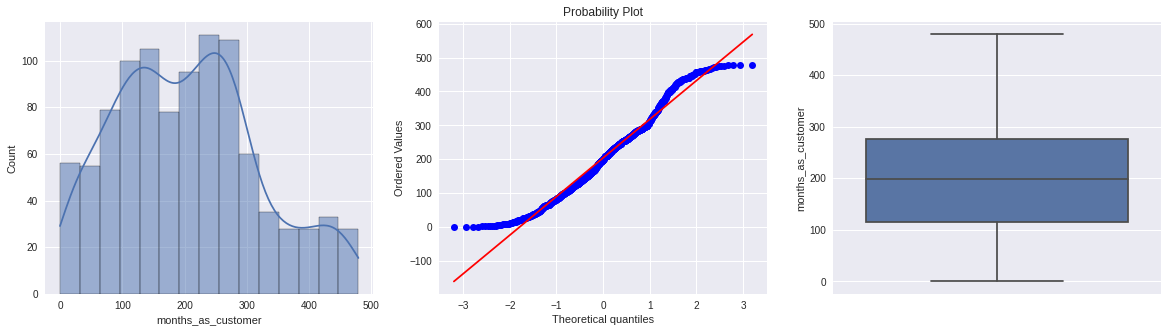

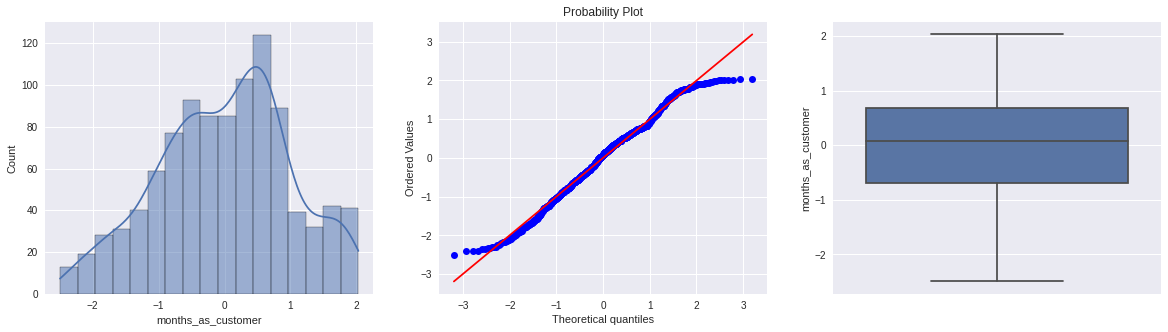

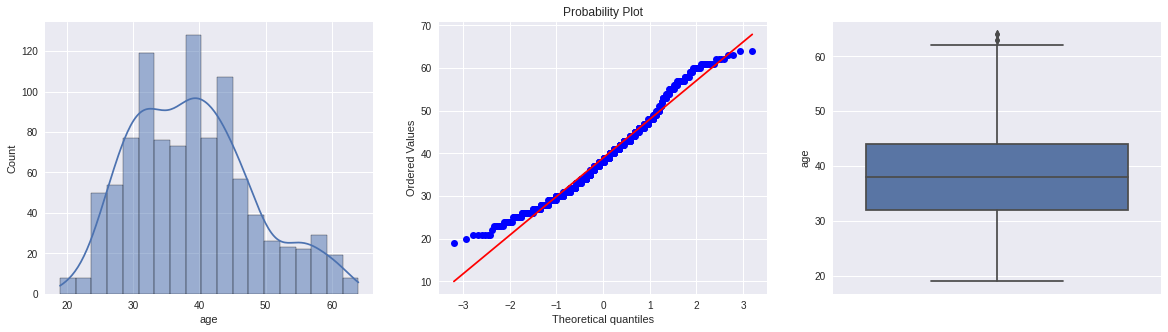

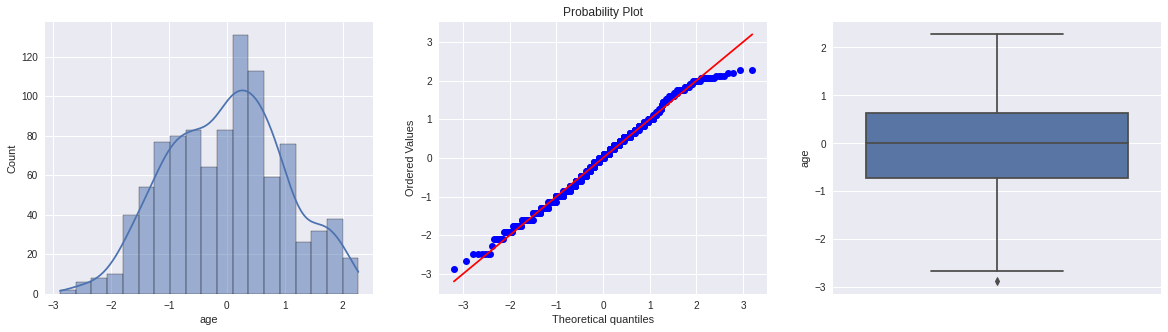

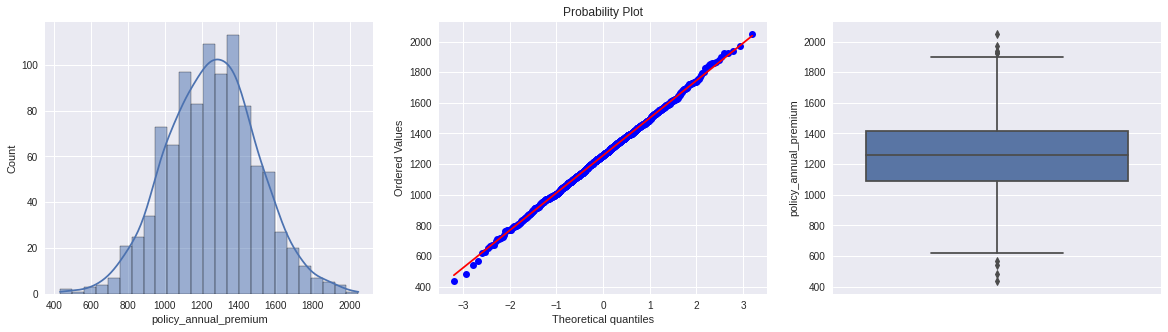

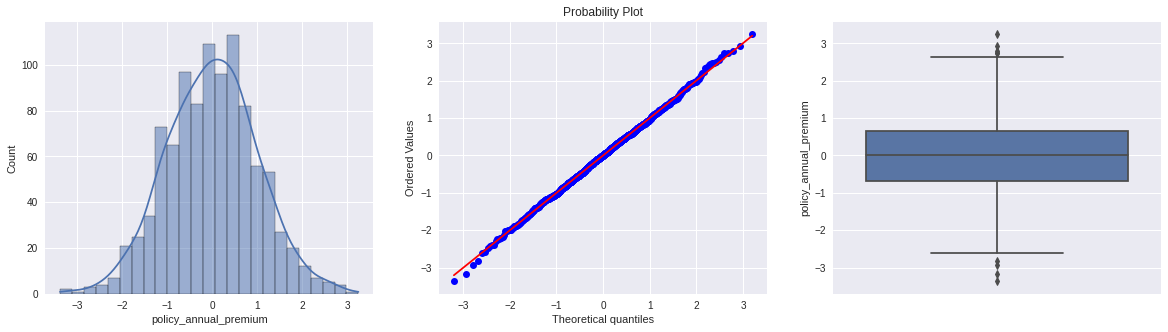

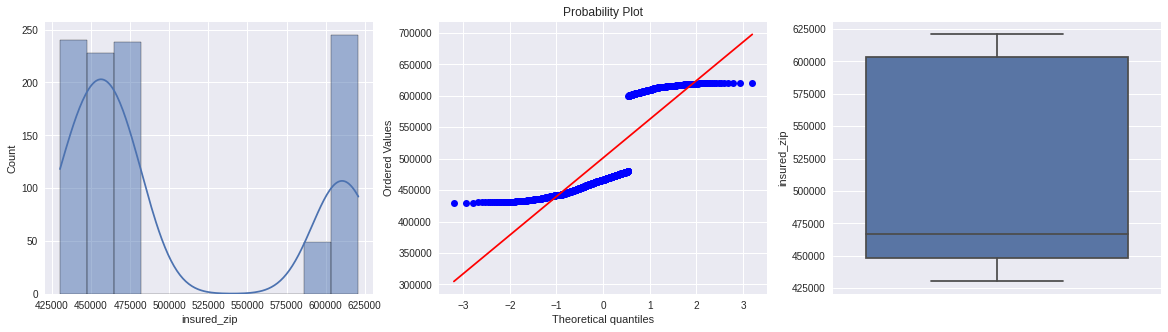

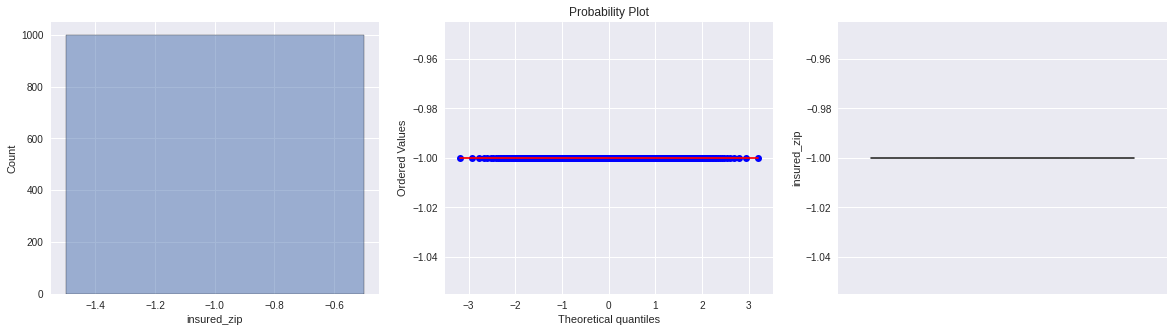

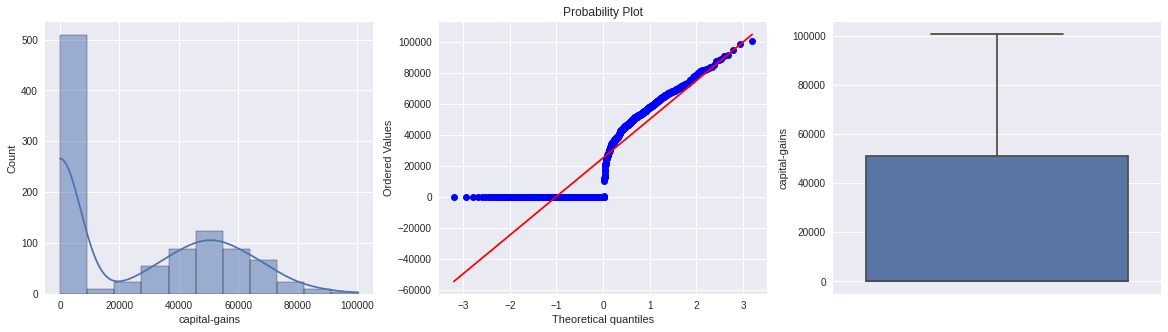

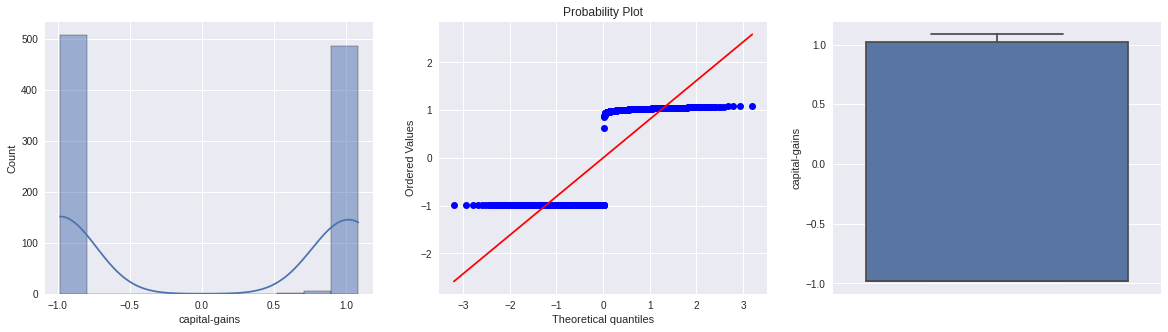

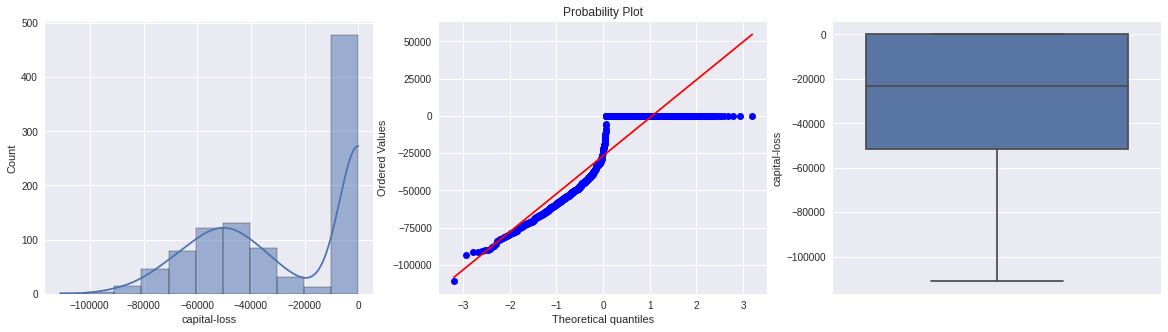

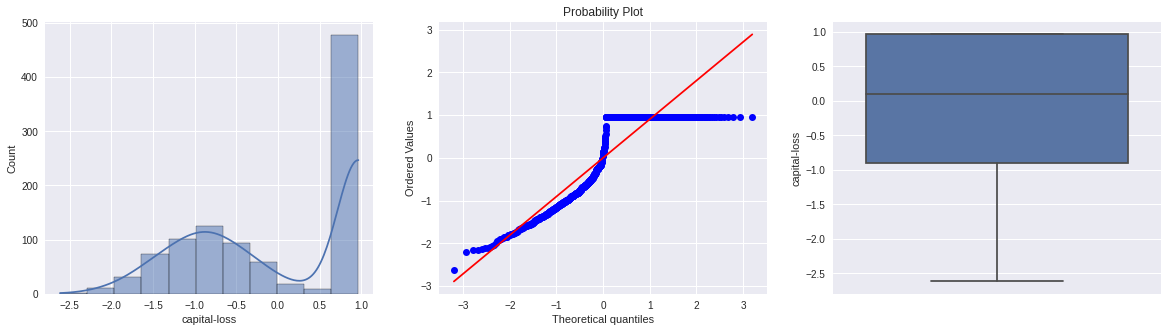

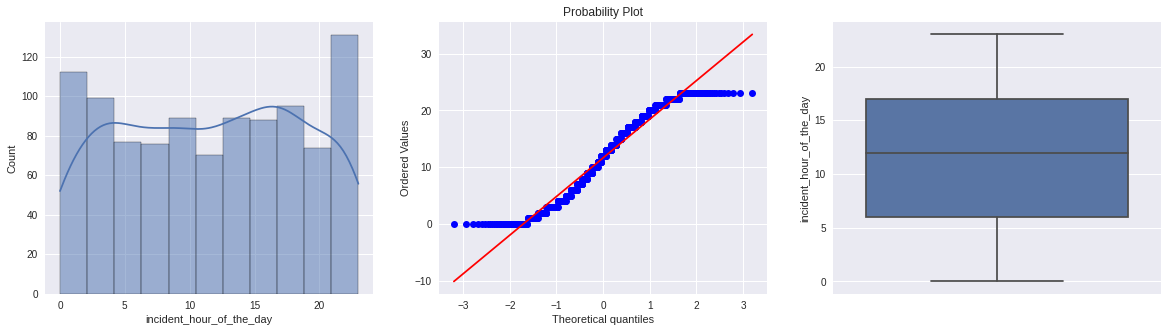

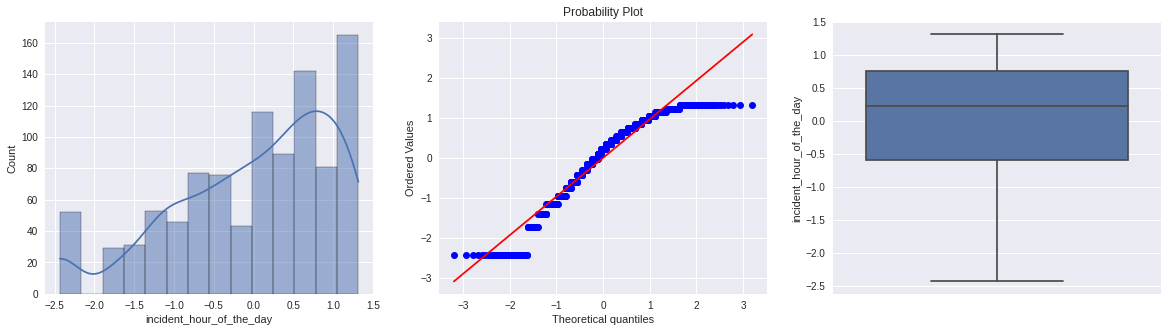

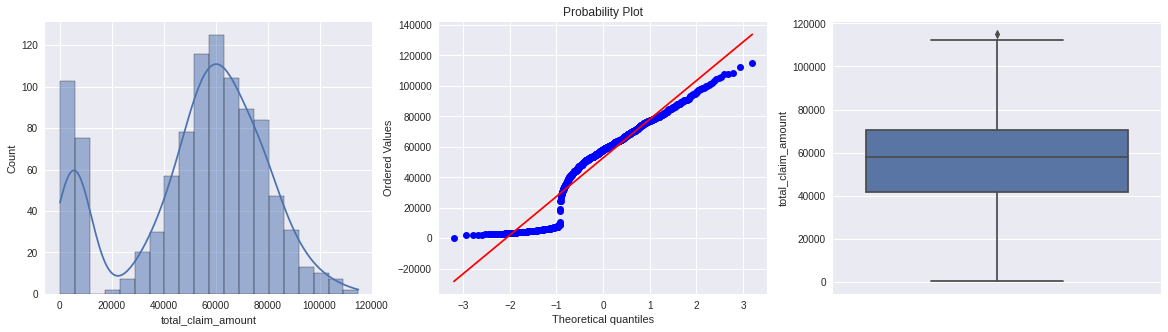

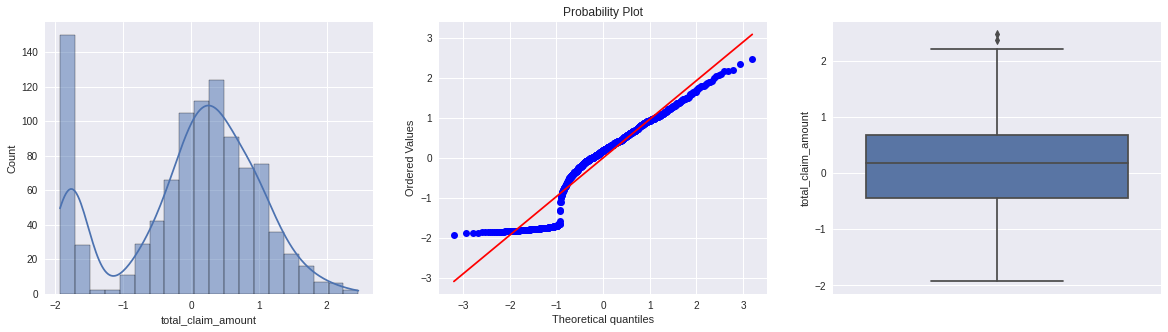

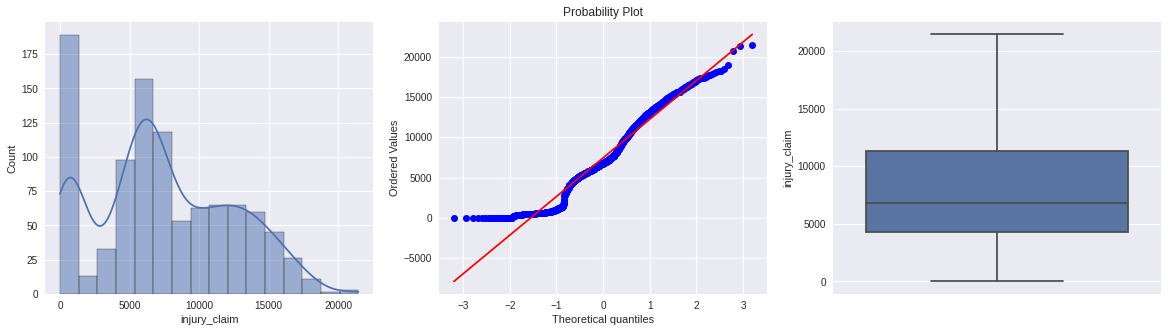

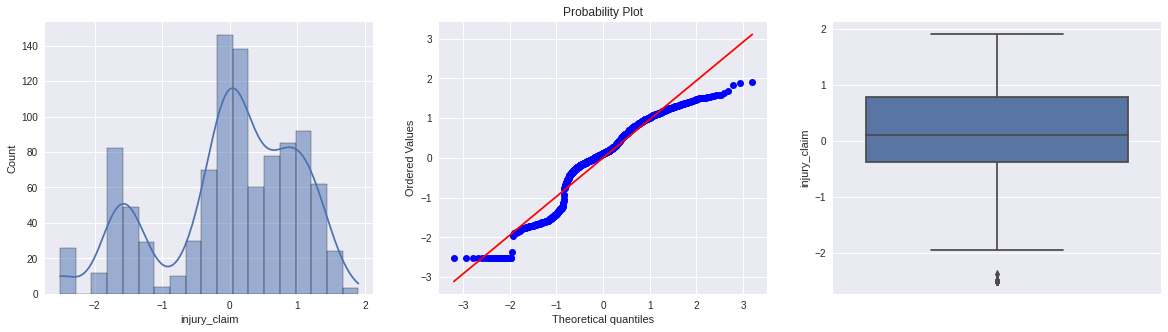

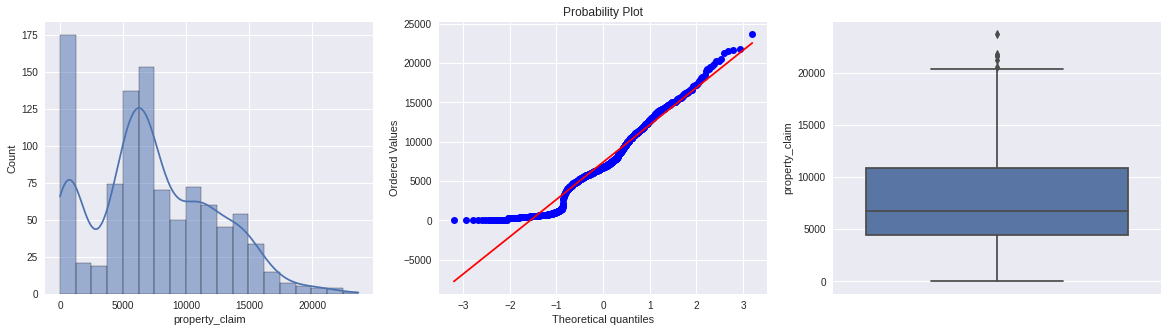

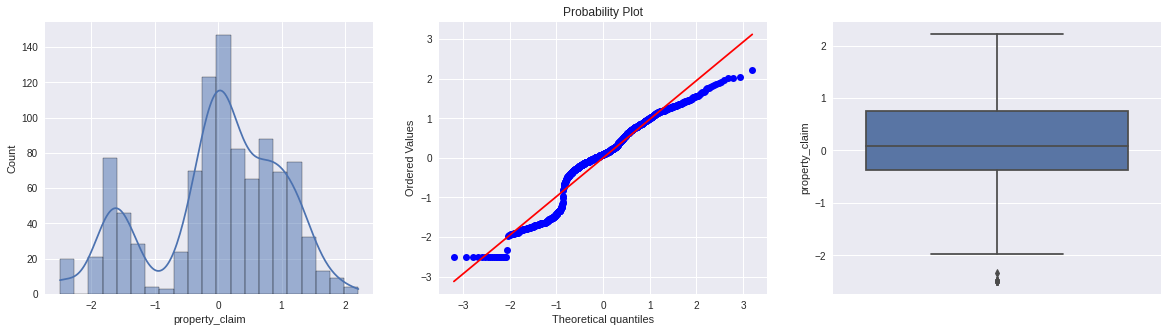

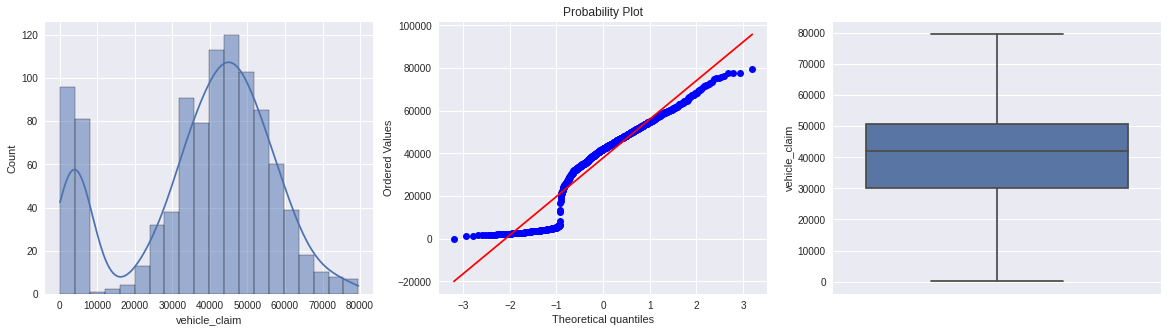

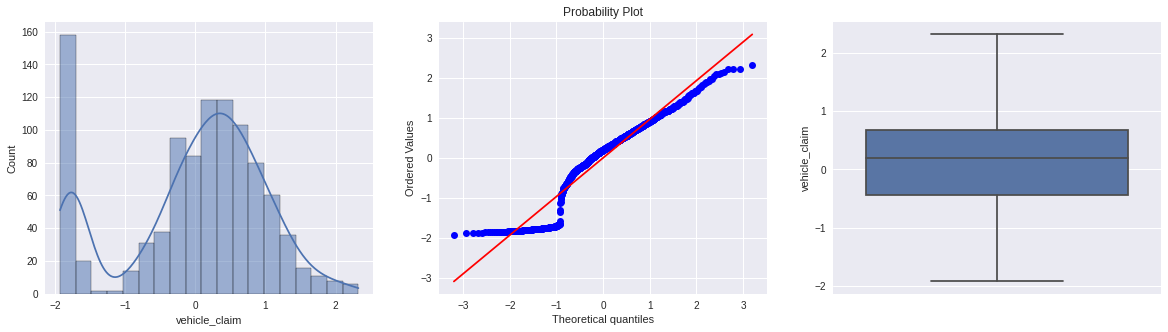

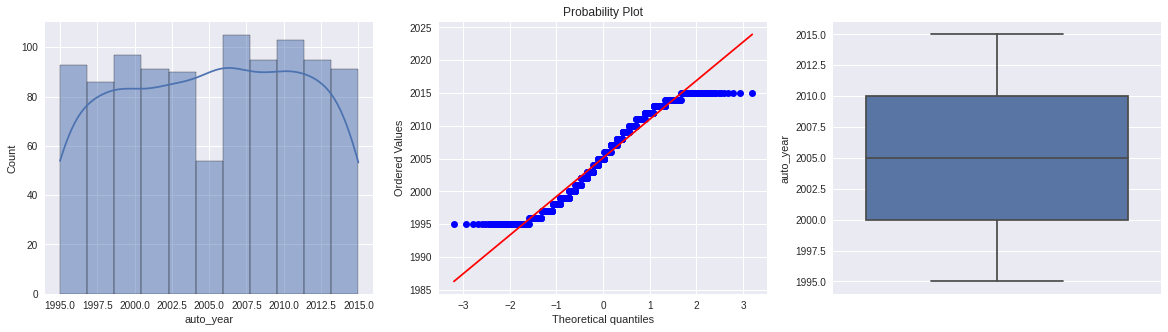

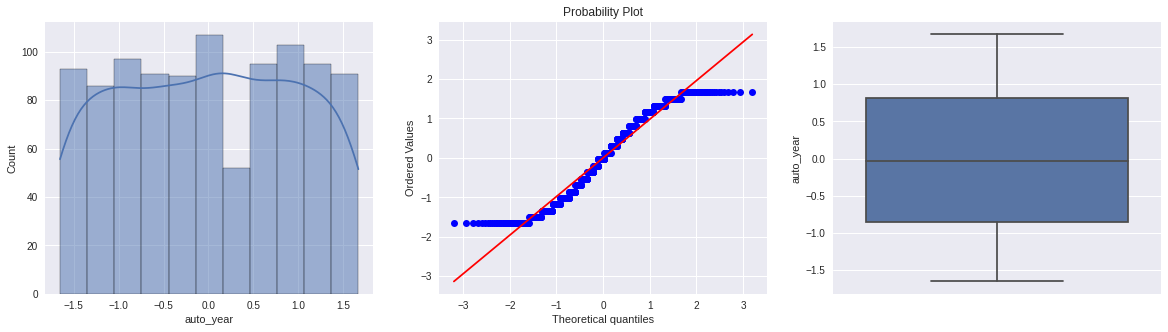

In [ ]:
import scipy.stats as stat
import pylab 
pt1=pd.DataFrame(pt1,columns=num)
#pd.concat([pt1,df.quality],axis=1)
for i in num:
  pplot(df,i)
  pplot(pt1,i)

In [ ]:
df_encoding[num]=pt1[num]

In [ ]:
df_encoding.drop('fraud_reported_Y',axis=1,inplace=True)

Normalization and outliers are taken care of 

## **Correlation**

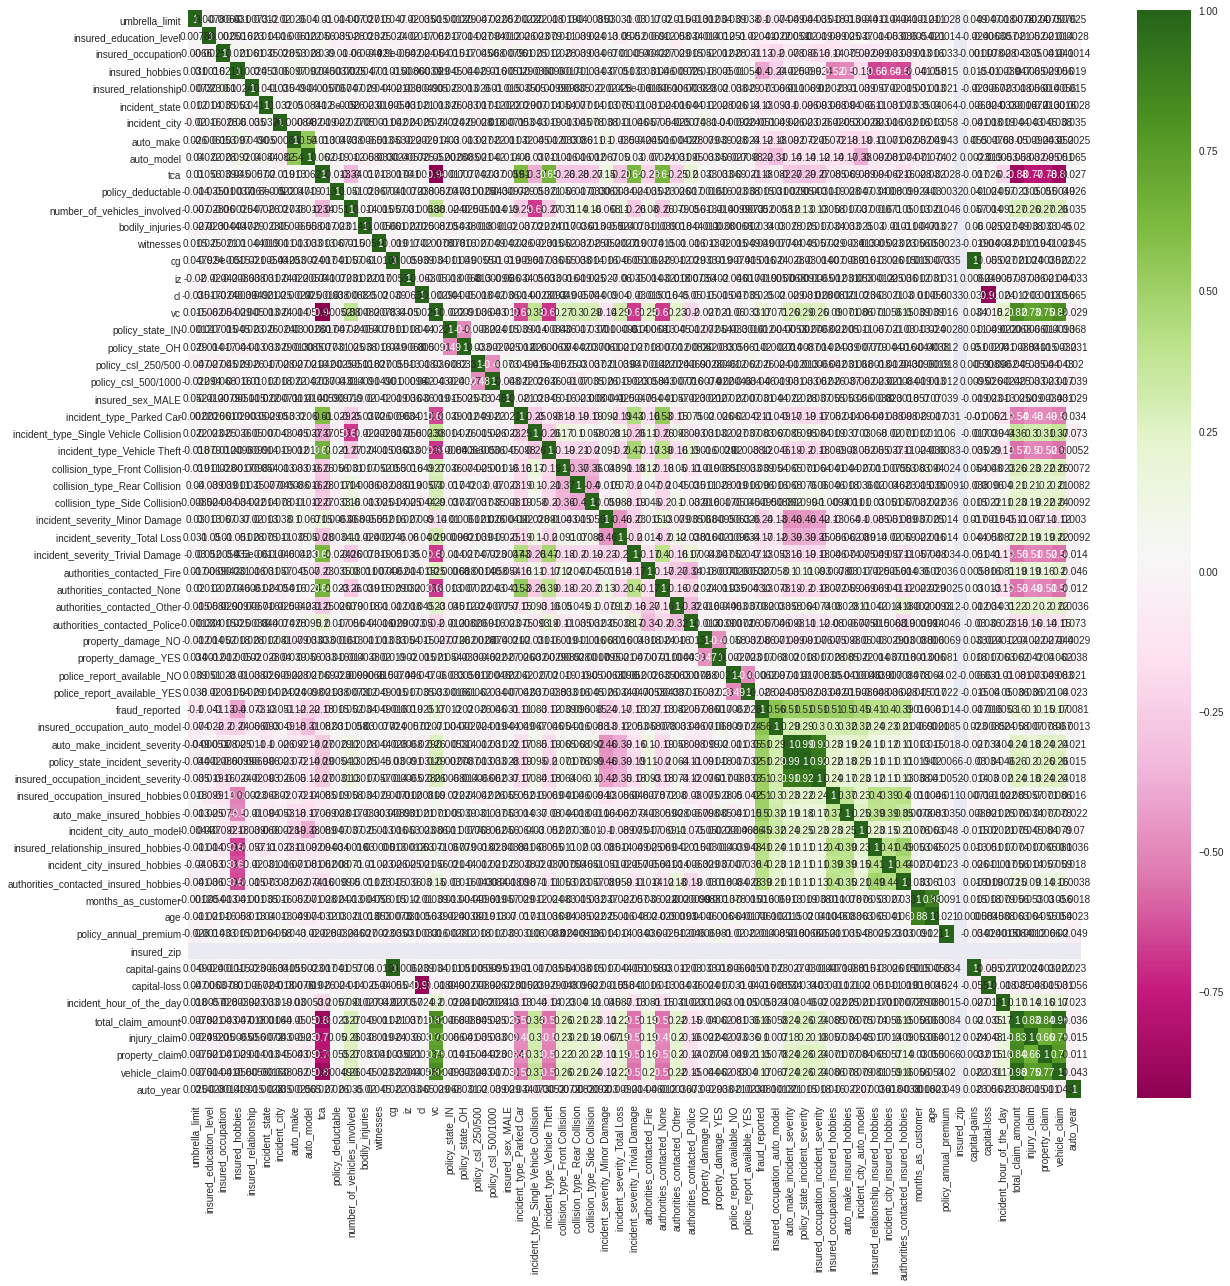

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df_encoding.corr(),annot=True,cmap='PiYG')

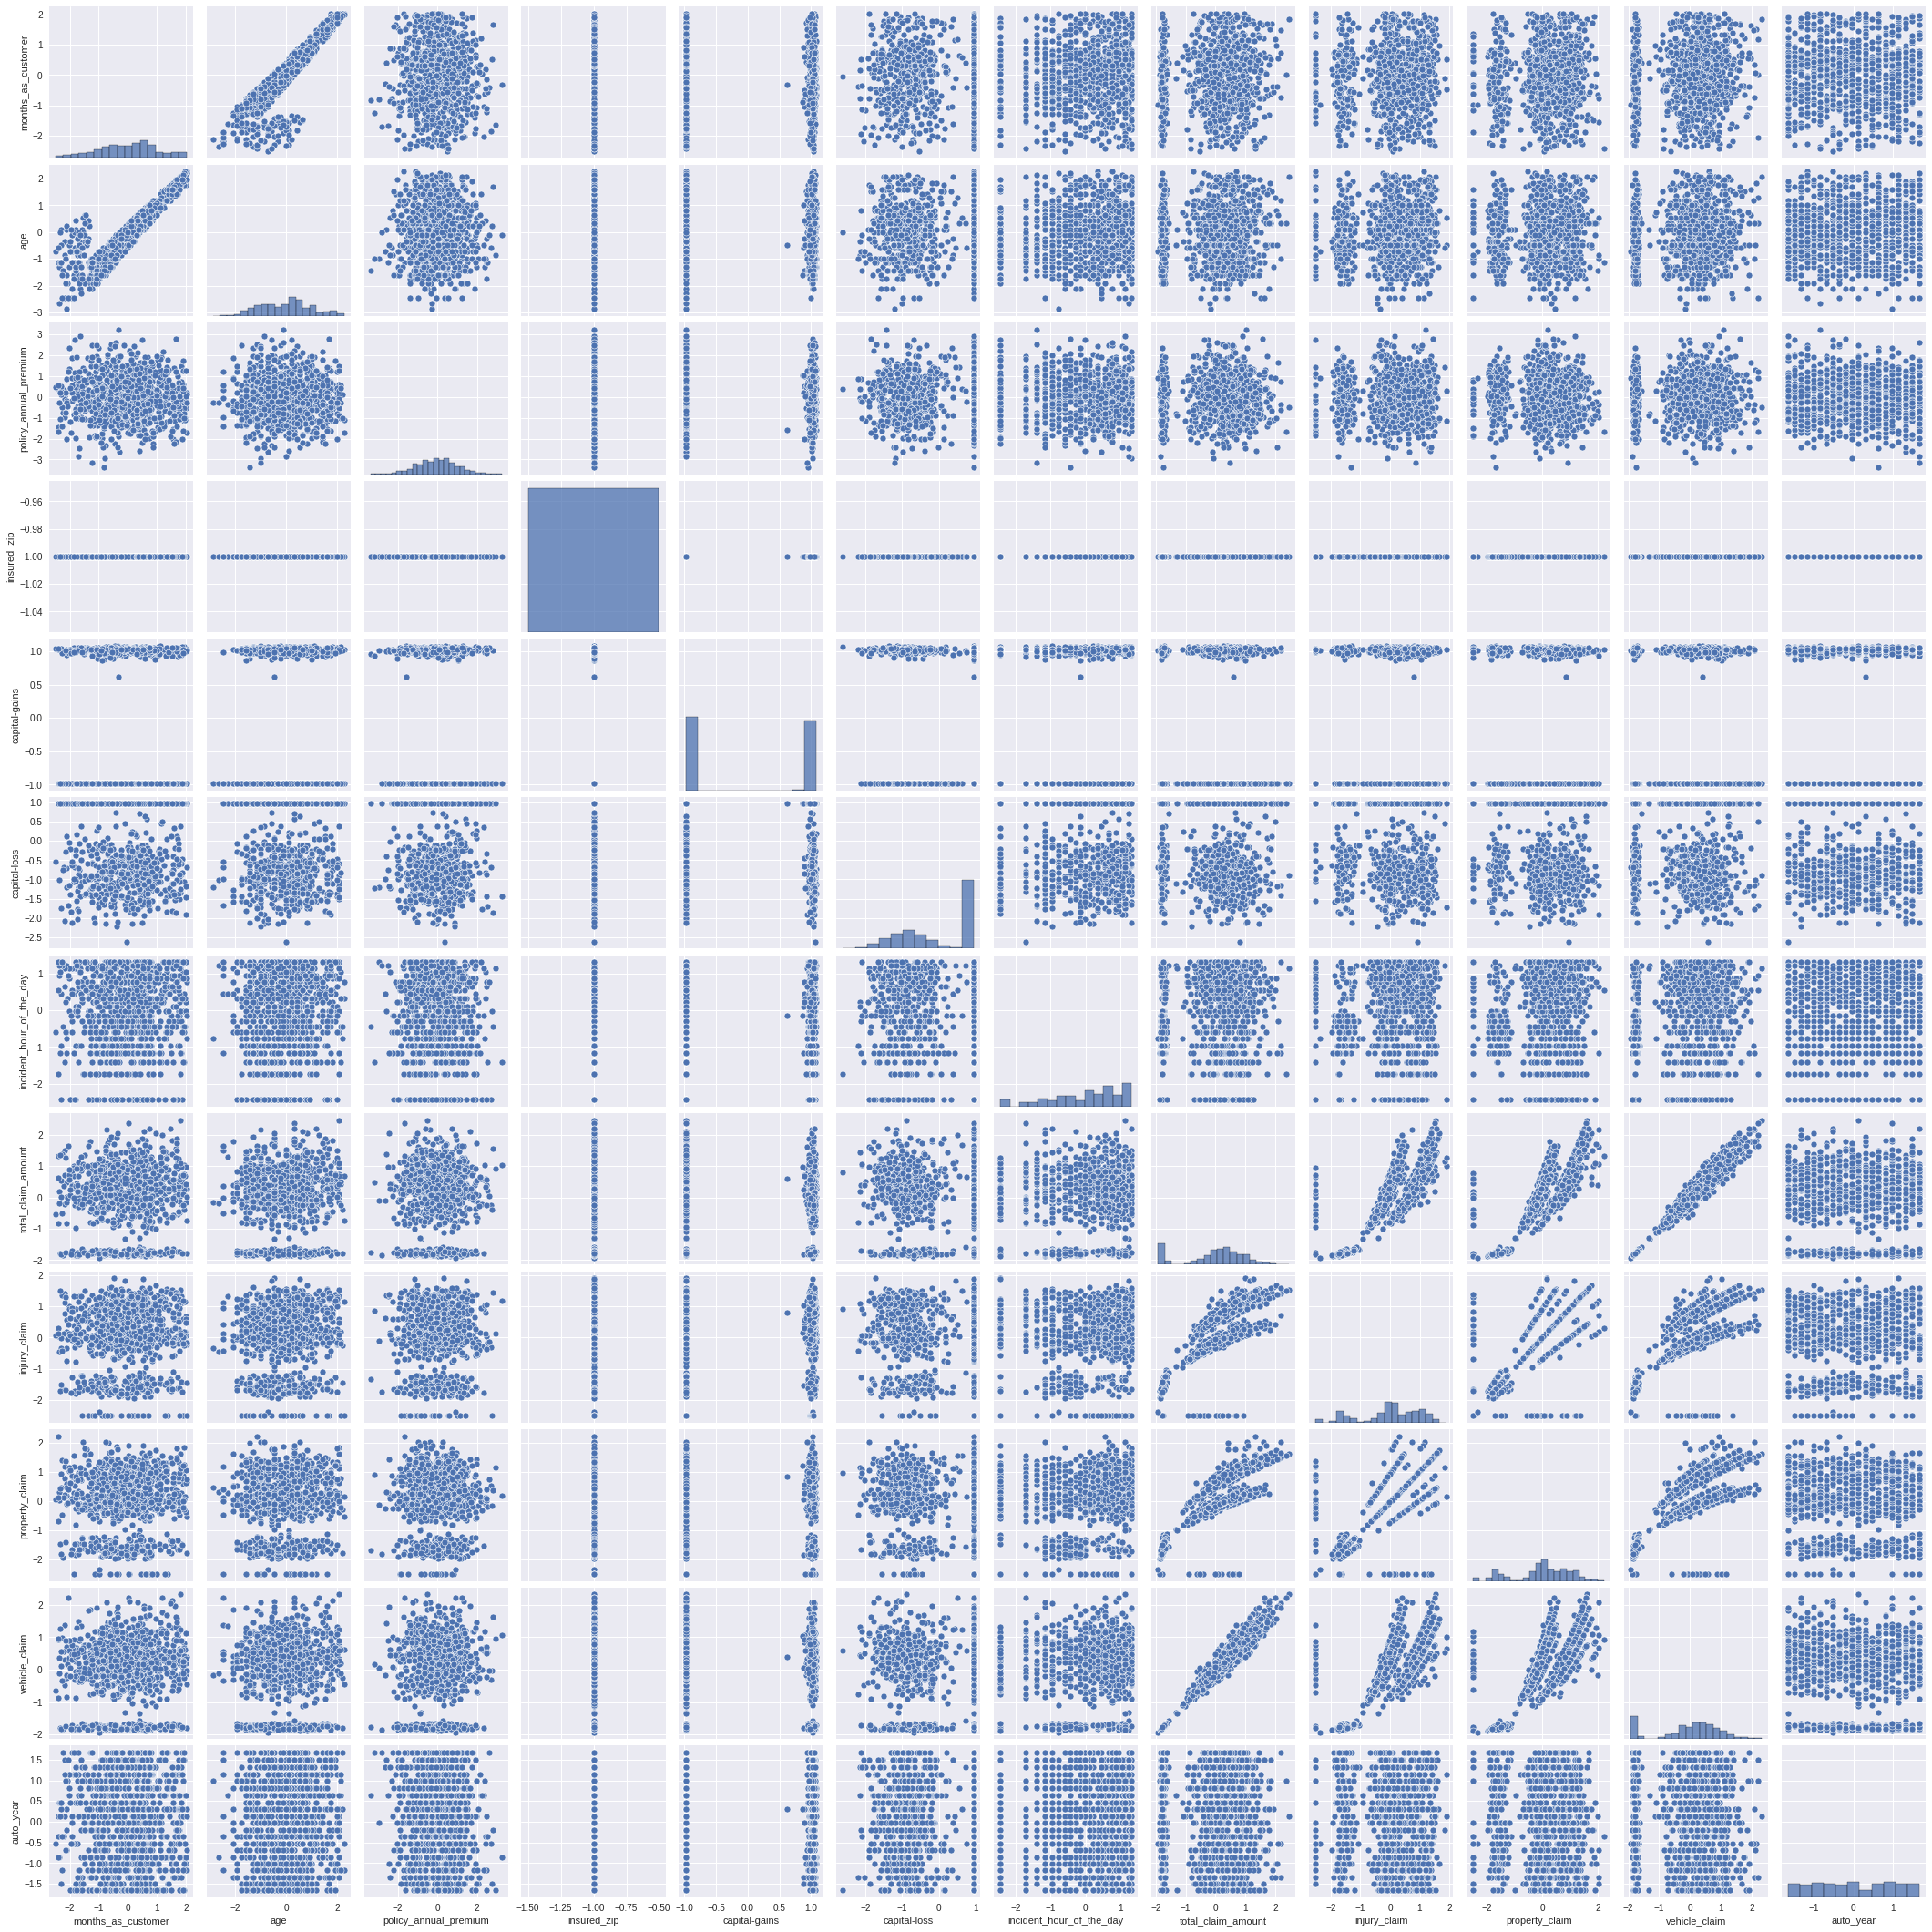

In [ ]:
sns.pairplot(df_encoding[num])

## **chi-square test**

In [ ]:
x=df_encoding.drop('fraud_reported',axis=1)
y=df_encoding['fraud_reported']

In [ ]:
from sklearn.feature_selection import SelectKBest,chi2
s = SelectKBest(chi2, k=12)
s.fit(x.drop(num,axis=1),y)

SelectKBest(k=12, score_func=<function chi2 at 0x7fdeb7e66560>)

In [ ]:
pd.DataFrame([s.scores_,s.pvalues_],columns=x.drop(num,axis=1).columns).T.sort_values(by=0)

0              1
iz                                        0.002669   9.588006e-01
police_report_available_NO                0.025642   8.727773e-01
collision_type_Side Collision             0.065096   7.986163e-01
insured_education_level                   0.070398   7.907585e-01
policy_state_IN                           0.102414   7.489519e-01
cg                                        0.135711   7.125827e-01
incident_city                             0.168326   6.816042e-01
property_damage_YES                       0.206533   6.494981e-01
policy_state_OH                           0.251282   6.161739e-01
cl                                        0.290394   5.899680e-01
policy_csl_250/500                        0.430769   5.116120e-01
insured_sex_MALE                          0.511838   4.743443e-01
police_report_available_YES               0.528951   4.670482e-01
authorities_contacted_Fire                0.583387   4.449877e-01
insured_relationship                      0.717387   3.970025e-01
bodily_injuries                           0.777356   3.779510e-01
collision_type_Front Collision            1.116315   2.907133e-01
policy_csl_500/1000                       1.484122   2.231307e-01
number_of_vehicles_involved               1.515437   2.183113e-01
witnesses                                 2.032810   1.539357e-01
authorities_contacted_Police              2.278490   1.311795e-01
umbrella_limit                            2.540111   1.109870e-01
incident_type_Single Vehicle Collision    4.066696   4.373673e-02
auto_make                                 4.687469   3.038336e-02
property_damage_NO                        4.863762   2.742647e-02
vc                                        5.115604   2.371160e-02
authorities_contacted_Other               5.394006   2.020603e-02
incident_state                            6.425719   1.124794e-02
collision_type_Rear Collision             6.560624   1.042598e-02
insured_occupation                        7.702752   5.513670e-03
incident_type_Parked Car                 10.401905   1.258854e-03
incident_type_Vehicle Theft              13.246324   2.731149e-04
incident_severity_Trivial Damage         15.736299   7.281339e-05
authorities_contacted_None               16.040687   6.199581e-05
incident_severity_Total Loss             21.114416   4.326609e-06
tca                                      26.160628   3.141632e-07
incident_severity_Minor Damage           37.121592   1.109879e-09
auto_model                               53.771526   2.252132e-13
policy_deductable                        72.283446   1.864045e-17
authorities_contacted_insured_hobbies   123.945056   8.660890e-29
incident_city_insured_hobbies           124.687574   5.957306e-29
insured_relationship_insured_hobbies    137.809328   8.022121e-32
incident_city_auto_model                143.465476   4.650054e-33
auto_make_insured_hobbies               189.163422   4.841054e-43
auto_make_incident_severity             189.783906   3.544051e-43
policy_state_incident_severity          190.265042   2.782776e-43
insured_occupation_insured_hobbies      193.854615   4.581366e-44
insured_occupation_incident_severity    197.747798   6.476290e-45
insured_occupation_auto_model           220.419447   7.326422e-50
insured_hobbies                         650.753332  1.532062e-143

first 12 var are not related to o/p

## **Separating dependent and independent variables**

In [ ]:
from sklearn.model_selection import train_test_split as TTS
x_train,x_test,y_train,y_test=TTS(x,y,test_size=0.1,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler as SS
ss=SS()
x_train_scaler=ss.fit_transform(x_train)
x_test_scaler= ss.transform(x_test)

# **Model Evaluation**

## **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression(random_state=0).fit(x_train_scaler, y_train)
y_pred=clf_lr.predict(x_test_scaler)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import f1_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
lr_acc=f1_score(y_test,y_pred)

[[76  1]
 [ 7 16]]
0.92
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95        77
         1.0       0.94      0.70      0.80        23

    accuracy                           0.92       100
   macro avg       0.93      0.84      0.88       100
weighted avg       0.92      0.92      0.92       100



In [ ]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(clf_lr, ss.transform(x), y, cv=10,scoring='f1')

lr_score=cv_results['test_score'].mean()



In [ ]:
lr_score

0.8305071614719388

## **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RFC 
clf_rfc = RFC().fit(x_train, y_train)
y_pred=clf_rfc.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import f1_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
rfc_acc=f1_score(y_test,y_pred)

[[76  1]
 [ 5 18]]
0.94
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96        77
         1.0       0.95      0.78      0.86        23

    accuracy                           0.94       100
   macro avg       0.94      0.88      0.91       100
weighted avg       0.94      0.94      0.94       100



In [ ]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(RFC(), x, y, cv=10,scoring='f1')

rfc_score=cv_results['test_score'].mean()


## **XGB Classifier**

In [ ]:
from xgboost import XGBClassifier as XBC
xgc=XBC().fit(x_train,y_train)

y_pred = xgc.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import f1_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
xgc_acc=f1_score(y_test,y_pred)

[[75  2]
 [ 4 19]]
0.94
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96        77
         1.0       0.90      0.83      0.86        23

    accuracy                           0.94       100
   macro avg       0.93      0.90      0.91       100
weighted avg       0.94      0.94      0.94       100



In [ ]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(XBC(), x, y, cv=10,scoring='f1')

xgc_score=cv_results['test_score'].mean()



## **Ada Boost Classifier**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier as ABC 
abc=ABC().fit(x_train,y_train)

y_pred = abc.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import f1_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
abc_acc=f1_score(y_test,y_pred)

[[75  2]
 [ 7 16]]
0.91
              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94        77
         1.0       0.89      0.70      0.78        23

    accuracy                           0.91       100
   macro avg       0.90      0.83      0.86       100
weighted avg       0.91      0.91      0.91       100



In [ ]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(ABC(), x, y, cv=10,scoring='f1')

abc_score=cv_results['test_score'].mean()



## **Extra Tree Classifier**

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier as ETC 

etc = ETC(random_state=123)
etc.fit(x_train, y_train)
y_pred=etc.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import f1_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
etc_acc=f1_score(y_test,y_pred)

[[74  3]
 [ 5 18]]
0.92
              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95        77
         1.0       0.86      0.78      0.82        23

    accuracy                           0.92       100
   macro avg       0.90      0.87      0.88       100
weighted avg       0.92      0.92      0.92       100



In [ ]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(ETC(), x, y, cv=10,scoring='f1')

etc_score=cv_results['test_score'].mean()


## **Support vector classifier**

In [ ]:
from sklearn.svm import SVC

svc = SVC(random_state=123)
svc.fit(x_train_scaler, y_train)
y_pred=svc.predict(x_test_scaler)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import f1_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
svc_acc=f1_score(y_test,y_pred)

[[74  3]
 [ 5 18]]
0.92
              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95        77
         1.0       0.86      0.78      0.82        23

    accuracy                           0.92       100
   macro avg       0.90      0.87      0.88       100
weighted avg       0.92      0.92      0.92       100



In [ ]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(SVC(), ss.transform(x), y, cv=10,scoring='f1')

svc_score=cv_results['test_score'].mean()


## **Comparing models**

In [ ]:
score=[lr_score,rfc_score,xgc_score,etc_score,svc_score]
error=[lr_acc,rfc_acc,xgc_acc,etc_acc,svc_acc]
name=['LR','RFC','XGB','ETC','SVC']
diff=[]
for i in range(5):
  diff.append(score[i]-error[i])
pd.DataFrame([name,score,error,diff]).T

0         1         2           3
0   LR  0.830507       0.8   0.0305072
1  RFC  0.849358  0.857143  -0.0077851
2  XGB   0.85545  0.863636 -0.00818618
3  ETC  0.855858  0.818182   0.0376757
4  SVC  0.845239  0.818182   0.0270567

Difference of all the model is very small so its better tochoose the model having best score i.e XGB

# **Hyper-parameter tuning** 

## **Random Forest**

In [ ]:
from sklearn.model_selection import GridSearchCV


n_estimators = [int(x) for x in range(200,1000,200)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 50, num = 5)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap
               }
print(random_grid)

{'n_estimators': [200, 400, 600, 800], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:

rf_random = GridSearchCV(RFC(), random_grid,  
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1,scoring='f1')

rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 864 candidates, totalling 2592 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 15.7min
[Parallel(n_jobs=-1)]: Done 2592 out of 2592 | elapsed: 16.6min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
print('Best score:', rf_random.best_score_)
print('Best score:', rf_random.best_params_)
print('Best score:', rf_random.best_estimator_)


Best score: 0.8713266067053219
Best score: {'bootstrap': False, 'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 600}
Best score: RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [ ]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(RFC(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), x, y, cv=10)

cv_results['test_score'].mean()

0.9299999999999999

In [ ]:
model=RFC(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# **Best Model Evaluation**

In [ ]:

from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(model, ss.transform(x), y, cv=10)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(confusion_matrix(y,y_pred))
print(accuracy_score(y,y_pred))
print(classification_report(y,y_pred))


[[724  29]
 [ 42 205]]
0.929
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.95       753
         1.0       0.88      0.83      0.85       247

    accuracy                           0.93      1000
   macro avg       0.91      0.90      0.90      1000
weighted avg       0.93      0.93      0.93      1000



In [ ]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(model, x, y, cv=10)

cv_results['test_score']

array([0.92, 0.94, 0.93, 0.91, 0.9 , 0.92, 0.94, 0.94, 0.95, 0.96])

In [ ]:

pred_prob1 = model.predict_proba(x_test)

0.9153020892151327


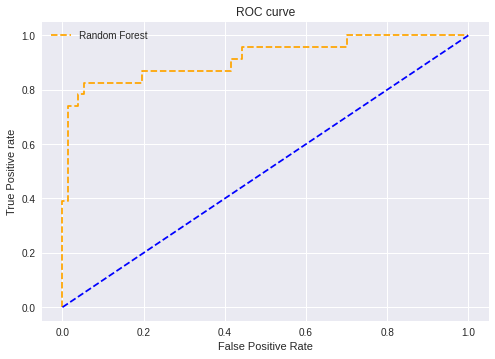

In [ ]:
from sklearn.metrics import roc_curve
model.fit(x_train_scaler,y_train)
pred_prob1 = model.predict_proba(x_test_scaler)
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])


print(auc_score1)


plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Random Forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

# **Saving the model** 

In [ ]:
import pickle

filename = '/content/drive/MyDrive/datatrained/Automobile_insurance_fraud/model.sav'
pickle.dump(model, open(filename, 'wb'))

# **Conclusion**

In [ ]:

filename = '/content/drive/MyDrive/datatrained/Automobile_insurance_fraud/model.sav'
model = pickle.load(open(filename, 'rb'))

In [ ]:
model.fit(x,y)
y_pred=model.predict(x)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(confusion_matrix(y,y_pred))
print(accuracy_score(y,y_pred))
print(classification_report(y,y_pred))

[[723  30]
 [ 41 206]]
0.929
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.95       753
         1.0       0.87      0.83      0.85       247

    accuracy                           0.93      1000
   macro avg       0.91      0.90      0.90      1000
weighted avg       0.93      0.93      0.93      1000



In [ ]:
pd.concat([pd.DataFrame(y_pred),pd.DataFrame(y)],axis=1).T

0    1    2    3    4    5    ...  994  995  996  997  998  999
0               1.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0
fraud_reported  1.0  1.0  0.0  1.0  0.0  1.0  ...  0.0  0.0  0.0  0.0  0.0  0.0

[2 rows x 1000 columns]